In [1]:
#Team Members: MohammadMatin Leis Saffar, Farzad Mohseni, Mohammad Amin Kheiri

#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#Reading the file
df = pd.read_csv('/content/House_Prices_Modified.csv')

<div dir="rtl">

#   بارگذاری داده‌ ها و کتابخانه‌ ها

### 👥 اعضای تیم:
- MohammadMatin Leis Saffar  
- Farzad Mohseni  
- Mohammad Amin Kheiri

---

### 📦 کتابخانه‌ های استفاده‌ شده:

در این پروژه، از کتابخانه‌ های زیر استفاده شده است:

- `numpy` برای عملیات عددی
- `pandas` برای تحلیل و پردازش داده‌ ها
- `matplotlib.pyplot` و `seaborn` برای مصورسازی داده‌ ها
- `missingno` برای بررسی مقادیر گمشده در دیتاست

---

### 📂 بارگذاری فایل داده

در این مرحله، فایل <code>House_Prices_Modified.csv</code> از مسیر <code>/content/</code> بارگذاری می‌شود.

</div>



In [2]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,NaN,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0.0,2,2008.0,WD,Normal,208500
1,2,20,RL,80.0,NaN,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,NaN,5,2007.0,WD,Normal,181500
2,3,60,RL,68.0,11250.0,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0.0,9,2008.0,WD,Normal,223500
3,4,70,RL,60.0,9550.0,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0.0,2,2006.0,WD,Abnorml,140000
4,5,60,RL,84.0,14260.0,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0.0,12,NaN,WD,Normal,250000


<div dir="rtl">

### 🧾 نمایش ۵ ردیف اول دیتاست

در این مرحله، با استفاده از دستور <code>()df.head</code>،  ***پنج*** ردیف اول دیتاست را مشاهده می‌کنیم. این کار به ما کمک می‌کند تا درک اولیه‌ای از ساختار داده‌ها به‌دست آوریم و بررسی کنیم:

- نام و ترتیب ستون‌ها
- نوع و شکل داده‌ها
- وجود احتمالی مقادیر گمشده (NaN)
- تشخیص متغیر هدف و ویژگی‌های مهم

</div>


In [3]:
#Checking the columns name integrity
print(df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<div dir="rtl">

### 🧩 بررسی نام ستون‌های دیتافریم

در این مرحله، با استفاده از دستور <code>df.columns</code>، نام تمام ستون‌های موجود در دیتاست بررسی می‌شود.  
این کار برای اطمینان از صحت نام‌گذاری، ترتیب، و آشنایی اولیه با ویژگی‌های موجود انجام می‌شود.

این لیست به ما کمک می‌کند تا:

- بدانیم دیتاست چند ستون دارد  
- نام هر ویژگی چه چیزی است  
- ویژگی هدف (متغیر وابسته) را شناسایی کنیم (در این دیتاست: <code>SalePrice</code>)

</div>


In [4]:
#The shape of dataset (Rows/Columns)
rows, cols = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")

Number of rows: 1460
Number of columns: 81


<div dir="rtl">

### 📊 بررسی ابعاد دیتاست

در این مرحله، با استفاده از تابع <code>df.shape</code>، تعداد ردیف‌ها و ستون‌های دیتافریم مشخص می‌شود.

این بررسی به ما کمک می‌کند تا بدانیم با چه حجم از داده سر و کار داریم و اندازه کلی دیتاست را درک کنیم.

✅ در خروجی مشخص شد که دیتاست شامل:

- <strong>1460 ردیف (نمونه)</strong>
- <strong>81 ستون (ویژگی)</strong>

می‌باشد.

</div>


In [5]:
#Features datatype
df.dtypes

,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,float64
...,...
MoSold,int64
YrSold,float64
SaleType,object
SaleCondition,object


<div dir="rtl">

### 🧬 بررسی نوع داده‌های ویژگی‌ها

در این مرحله با استفاده از دستور <code>df.dtypes</code>، نوع داده‌ای هر ستون در دیتاست بررسی می‌شود.

این بررسی برای مراحل بعدی مانند تبدیل داده‌ها (Encoding)، تشخیص ویژگی‌های عددی یا متنی، و انتخاب روش مناسب برای تحلیل و مدل‌سازی ضروری است.

🔎 دسته‌بندی معمول داده‌ها در این دیتاست:

- <code>int64</code>: ویژگی‌های عددی صحیح مانند سال ساخت، تعداد طبقات، تعداد پارکینگ و ...  
- <code>float64</code>: ویژگی‌های عددی اعشاری مانند مساحت زمین، متراژ فضاها و ...  
- <code>object</code>: ویژگی‌های متنی مانند نوع منطقه، جنس کف‌پوش، سبک خانه و ...

</div>


In [6]:
#Finding the columns' datatypes and non-null value counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        853 non-null    float64
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<div dir="rtl">

### 🧮 بررسی نوع داده‌ها و تعداد مقادیر غیرگمشده

در این مرحله، با استفاده از دستور <code>df.info</code>، اطلاعات ترکیبی از نوع داده‌ها و تعداد مقادیر موجود (غیر گمشده) در هر ستون بررسی می‌شود.

این تحلیل به ما کمک می‌کند تا:

- نوع داده‌ هر ستون (عددی، متنی و ...) را بشناسیم  
- ستون‌هایی که دارای داده‌های ناقص (NaN) هستند را تشخیص دهیم  
- دید کلی نسبت به وضعیت کیفیت داده‌ها داشته باشیم  

📌 توجه: ستون‌هایی که تعداد non-null آن‌ها کمتر از 1460 ردیف است، دارای مقادیر گمشده‌اند و باید در مراحل بعدی مدیریت شوند.

</div>


In [7]:
#Statistical overview of variables
df.describe().round(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.0,1201.00,853.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,...,853.00,1460.00,1460.00,1460.00,1460.00,1460.00,853.00,1460.00,853.00,1460.0
mean,730.50,56.9,70.05,10462.70,6.10,5.58,1971.27,1984.87,103.69,443.64,...,95.68,46.66,21.95,3.41,15.06,2.76,23.85,6.32,2007.82,180921.2
std,421.61,42.3,24.28,8566.93,1.38,1.11,30.20,20.65,181.07,456.10,...,123.10,66.26,61.12,29.32,55.76,40.18,167.18,2.70,1.33,79442.5
min,1.00,20.0,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.0
25%,365.75,20.0,59.00,7728.00,5.00,5.00,1954.00,1967.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.0
50%,730.50,50.0,69.00,9473.00,6.00,5.00,1973.00,1994.00,0.00,383.50,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.0
75%,1095.25,70.0,80.00,11553.00,7.00,6.00,2000.00,2004.00,166.00,712.25,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.0
max,1460.00,190.0,313.00,164660.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,...,670.00,547.00,552.00,508.00,480.00,738.00,2500.00,12.00,2010.00,755000.0


<div dir="rtl">

### 📈 مرور آماری ویژگی‌های عددی

در این مرحله، با استفاده از دستور <code>df.describe().round(2)</code>، یک تحلیل آماری کلی از ویژگی‌های عددی دیتاست به‌دست می‌آید.

این آمار شامل اطلاعات زیر برای هر ستون عددی است:

- تعداد مقادیر غیر گمشده (count)
- میانگین (mean)
- انحراف معیار (std)
- کمینه (min)
- چارک اول (25٪)
- میانه یا مقدار میانی (50٪)
- چارک سوم (75٪)
- بیشینه (max)

</div>


In [8]:
#Information about SalePrice feature
df['SalePrice'].describe().round(2)

,SalePrice
count,1460.0
mean,180921.2
std,79442.5
min,34900.0
25%,129975.0
50%,163000.0
75%,214000.0
max,755000.0


<div dir="rtl">

### 💰 بررسی آماری ویژگی هدف (SalePrice)

ویژگی <code>SalePrice</code> متغیر هدف ما در این پروژه است. در این بخش، با استفاده از دستور <code>df['SalePrice'].describe().round(2)</code>، خلاصه‌ای آماری از قیمت خانه‌ها به‌دست می‌آوریم.

خلاصه آمار این ویژگی:

- تعداد نمونه‌ها: <strong>1460</strong>  
- میانگین قیمت: <strong>180,921 دلار</strong>  
- انحراف معیار: حدود <strong>79,443 دلار</strong>  
- کمترین قیمت خانه: <strong>34,900 دلار</strong>  
- بیشترین قیمت خانه: <strong>755,000 دلار</strong>  
- میانه (50٪): <strong>163,000 دلار</strong>  
- 25٪ از خانه‌ها قیمتی کمتر از <strong>129,975 دلار</strong> داشته‌اند  
- 75٪ از خانه‌ها قیمتی کمتر از <strong>214,000 دلار</strong> داشته‌اند

</div>


In [9]:
#Number of Duplicated rows
df.duplicated().sum()

np.int64(0)

<div dir="rtl">

### 🔁 بررسی سطرهای تکراری در دیتاست

برای اطمینان از عدم وجود داده‌های تکراری، از دستور <code>()df.duplicated().sum</code> استفاده کردیم. این دستور:

- بررسی می‌کند که کدام سطرها در دیتافریم دقیقاً مشابه سطرهای دیگر هستند  
- در صورت وجود، تعداد آن‌ها را به‌صورت عددی برمی‌گرداند

🔎 نتیجه بررسی:

✅ خروجی برابر با <code>0</code> بود، یعنی هیچ سطر تکراری در این دیتاست وجود ندارد.

این موضوع نشان می‌دهد که داده‌ها از لحاظ تکرار، پاک و بدون افزونگی هستند.

</div>


In [10]:
#Number of null cells of each feature
missing_features = df.isnull().sum()
missing_features

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,607
...,...
MoSold,0
YrSold,607
SaleType,0
SaleCondition,0


<div dir="rtl">

### 🧩 بررسی تعداد مقادیر گمشده در هر ستون

در این مرحله با استفاده از دستور <code>()df.isnull().sum</code>، تعداد سلول‌های گمشده (مقدار <code>NaN</code>) برای هر ستون در دیتاست بررسی شد.

🔹 این بررسی مشخص می‌کند که کدام ستون‌ها دارای داده‌های ناقص هستند و چند مقدار در آن‌ها گمشده است.

🔍 نمونه‌ای از نتایج به‌دست‌آمده:

- ستون <code>LotFrontage</code> دارای <strong>259</strong> مقدار گمشده  
- ستون <code>LotArea</code> دارای <strong>607</strong> مقدار گمشده  
- ستون <code>YrSold</code> نیز دارای <strong>607</strong> مقدار گمشده است  
- سایر ستون‌ها فاقد مقادیر گمشده‌اند

📌 این اطلاعات در مراحل بعدی برای **پاک‌سازی داده‌ها** و **مدیریت مقادیر گمشده** (مثل جایگزینی با میانگین، میانه یا مقدار پرتکرار) استفاده خواهند شد.

</div>


In [11]:
missing_features = missing_features[missing_features > 0]
num_missing_features = len(missing_features)
print(f"تعداد ویژگی‌هایی که دارای مقادیر گمشده هستند: {num_missing_features}")

تعداد ویژگی‌هایی که دارای مقادیر گمشده هستند: 23


<div dir="rtl">

### 🧮 شمارش ویژگی‌هایی که دارای مقادیر گمشده هستند

در ادامه بررسی مقادیر گمشده، تنها ستون‌هایی که حداقل یک مقدار گمشده دارند فیلتر شده‌اند.  
این کار با استفاده از شرط زیر انجام گرفت:

</div>

```python
missing_features = missing_features[missing_features > 0]


<div dir="rtl">

### 🏠 معرفی اولیه دیتاست فروش خانه در Ames

این دیتاست که مربوط به فروش خانه‌ها در شهر **Ames** است، شامل:

- 🧾 **۱۴۶۰ سطر (رکورد)**  
- 📊 **۸۰ ویژگی (Feature)** که جزئیات گوناگونی از هر خانه را در بر می‌گیرند.

---

### 🎯 ویژگی هدف: `SalePrice`

- میانگین قیمت فروش خانه‌ها: **۱۸۰,۹۲۱ دلار**
- کمترین قیمت ثبت‌شده: **۳۴,۹۰۰ دلار**
- بیشترین قیمت ثبت‌شده: **۷۵۵,۰۰۰ دلار**

📈 این بازه گسترده نشان می‌دهد که قیمت‌ها تنوع زیادی دارند و نیاز به تحلیل دقیق دارند.

---

### 🧹 بررسی پاک بودن داده‌ها

- ✅ **هیچ رکورد تکراری (duplicated row)** در دیتاست وجود ندارد.
- ⚠️ **۲۳ ویژگی** شامل مقادیر گمشده (NaN) هستند.

📌 اطلاعات دقیق‌تر درباره این مقادیر در **تکه‌کدهای شماره ۶ و ۲۵** ارائه شده‌اند.

---

### 🔧 گام بعدی

در ادامه، به سراغ **مدیریت و جایگزینی مقادیر گمشده** خواهیم رفت تا دیتاست را برای تحلیل‌های بعدی آماده کنیم.

</div>


In [12]:
#First step: Finding which Features has NaN cells + their datatype
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0] #only columns that got NaN value

#making a dataframe for showing each column missing count and its type
missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Data Type': df.dtypes[missing_values.index]
})

missing_info.sort_values(by='Missing Count',ascending=False) #sorting the columns based on count of missing values

,Missing Count,Data Type
PoolQC,1453,object
MiscFeature,1406,object
Alley,1369,object
Fence,1179,object
MasVnrType,872,object
FireplaceQu,690,object
LotArea,607,float64
WoodDeckSF,607,float64
MiscVal,607,float64
YrSold,607,float64


<div dir="rtl">

### 🧩 ساخت جدول اطلاعات ویژگی‌هایی که دارای مقادیر گمشده هستند

در این بخش قصد داریم ستون‌هایی از دیتاست را که دارای مقادیر گمشده (NaN) هستند شناسایی کنیم و در قالب یک جدول، هم تعداد مقادیر گمشده و هم نوع داده‌ی آن‌ها را نمایش دهیم. این کار به صورت مرحله‌به‌مرحله انجام شد:

---

#### ✅ مرحله ۱: محاسبه مجموع مقادیر گمشده در هر ستون

</div>

```python
missing_values = df.isnull().sum()
```

<div dir="rtl">

در این خط، با استفاده از تابع `()isnull` و سپس `()sum`، تعداد مقادیر `NaN` در هر ستون از دیتافریم محاسبه شد. نتیجه یک شیء از نوع `Series` شامل نام ستون‌ها و تعداد مقادیر گمشده آن‌هاست.

---

#### ✅ مرحله ۲: فیلتر ستون‌هایی که واقعاً مقدار گمشده دارند

</div>

```python
missing_values = missing_values[missing_values > 0]
```

<div dir="rtl">

در این مرحله فقط ستون‌هایی نگه داشته می‌شوند که **تعداد مقادیر گمشده‌شان بیشتر از صفر** باشد. ستون‌هایی که هیچ مقدار `NaN` ندارند حذف می‌شوند.

---

#### ✅ مرحله ۳: ساخت دیتافریم از تعداد مقادیر گمشده و نوع داده

</div>

```python
missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Data Type': df.dtypes[missing_values.index]
})
```

<div dir="rtl">

در این مرحله یک دیتافریم جدید به نام `missing_info` ساخته می‌شود که دارای دو ستون است:

- `Missing Count`: تعداد سلول‌های گمشده در هر ستون  
- `Data Type`: نوع داده‌ی هر ستون (مثلاً `object`، `int64`، `float64`)

---

#### ✅ مرحله ۴: مرتب‌سازی جدول براساس تعداد مقادیر گمشده (بصورت نزولی)

</div>

```python
missing_info.sort_values(by='Missing Count', ascending=False)
```

<div dir="rtl">

در نهایت، جدول `missing_info` بر اساس ستون `Missing Count` مرتب می‌شود تا ستون‌هایی که بیشترین مقدار گمشده دارند، در بالای جدول نمایش داده شوند.

---

🎯 این جدول برای مراحل بعدی که در آن باید درباره حذف یا جایگزینی مقادیر گمشده تصمیم‌گیری شود، کاملاً ضروری و کلیدی است.


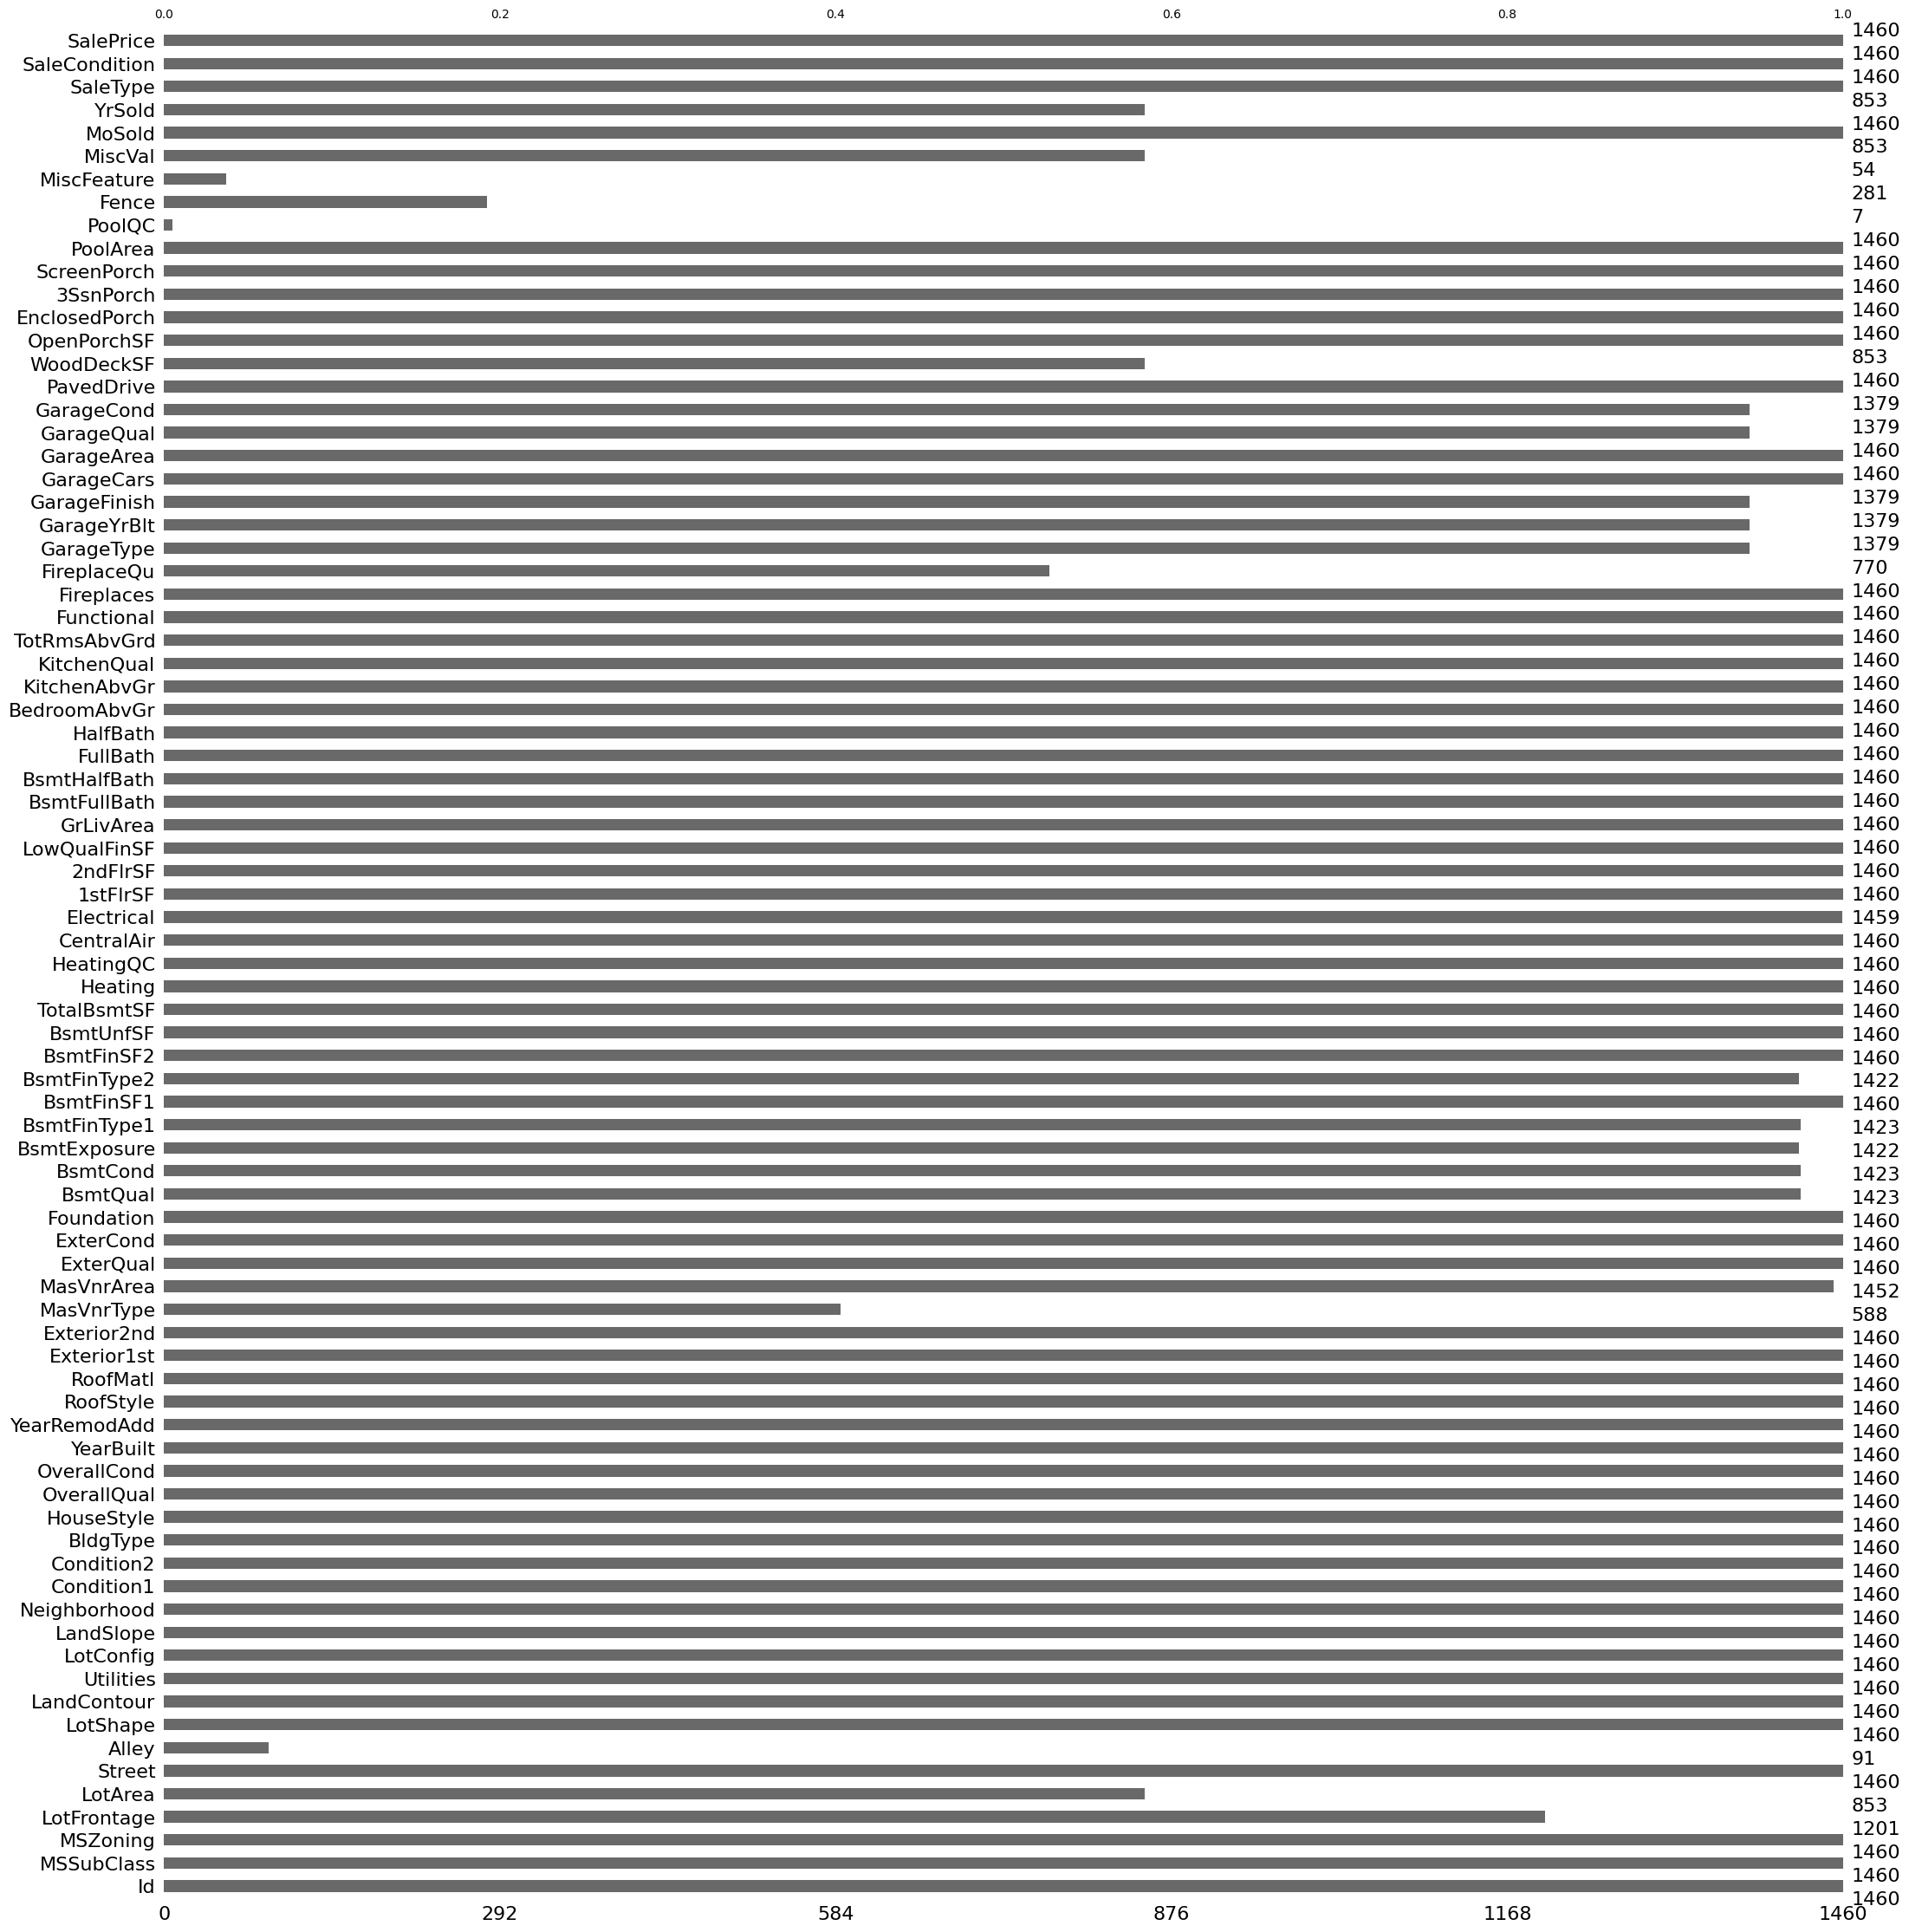

In [13]:
#Visualizing value count of each column
import missingno as msno

plt.figure(figsize=(10,6))
msno.bar(df)
plt.show()

<div dir="rtl">

### 📊 بررسی و نمایش گرافیکی مقادیر گمشده با استفاده از `missingno`

در این مرحله، برای بررسی بصری وضعیت مقادیر گمشده در کل دیتافریم، از کتابخانه‌ی کاربردی `missingno` استفاده شد. در ادامه کد و توضیح کامل هر خط آورده شده است:

---

#### ✅ کد کامل:

</div>

```python
# 📥 ایمپورت کتابخانه برای مصورسازی مقادیر گمشده
import missingno as msno

# 🖼️ تعیین اندازه‌ی شکل خروجی نمودار
plt.figure(figsize=(10,6))

# 📊 ترسیم نمودار bar از داده‌های دیتافریم
msno.bar(df)

# 🖱️ نمایش نمودار در خروجی
plt.show()
```

---

<div dir="rtl">

#### 📌 توضیح خط‌ به‌ خط:

1. **`import missingno as msno`**  
   کتابخانه `missingno` مخصوص نمایش گرافیکی مقادیر گمشده در دیتاست‌ها است.  
   با `as msno` یک اسم مستعار برای راحت‌تر صدا زدن تابع‌ها مشخص می‌کنیم.

2. **`plt.figure(figsize=(10,6))`**  
   با استفاده از `matplotlib.pyplot` (که قبلاً با `plt` ایمپورت شده)، اندازه‌ی نمودار خروجی را تعیین می‌کنیم:  
   - عرض = ۱۰ واحد  
   - ارتفاع = ۶ واحد  
   این باعث می‌شود نمودار خواناتر و خوش‌فرم‌تر نمایش داده شود.

3. **`msno.bar(df)`**  
   این خط اصلی‌ترین بخش است:  
   - یک نمودار میله‌ای برای همه ستون‌های `df` ترسیم می‌شود.  
   - طول هر میله نشان‌دهنده‌ی تعداد مقادیر **غیر گمشده** (موجود) در آن ستون است.  
   - ستون‌هایی که ناقص هستند، میله‌ی کوتاه‌تری دارند و به‌راحتی قابل شناسایی‌اند.

4. **`()plt.show`**  
   برای نمایش نمودار در خروجی استفاده می‌شود. بدون این خط، ممکن است در برخی محیط‌ها نمودار نمایش داده نشود.

---

### 🔍 تفسیر خروجی:

- ستون‌هایی مانند `SalePrice`, `SaleCondition` و بسیاری دیگر، میله‌های کامل دارند (یعنی داده‌ی گمشده ندارند).  
- اما ستون‌هایی مانند `PoolQC`, `MiscFeature`, `Fence`, `Alley`، مقدار زیادی داده‌ی گمشده دارند و میله‌ی آن‌ها بسیار کوتاه است.  
- این مصورسازی کمک می‌کند در یک نگاه، وضعیت کامل بودن یا ناقص بودن دیتاست را متوجه شویم.

---

✅ **توضیح عملکرد کد:**

- `missingno.bar(df)` یک نمودار میله‌ای از تمام ستون‌ها ترسیم می‌کند.  
- ستون‌هایی که کاملاً پر هستند (یعنی ۱۴۶۰ مقدار دارند)، میله‌ی کامل با عدد 1460 دارند.  
- ستون‌هایی که دارای مقدار گمشده‌اند، میله‌ای ناقص دارند (مثلاً ستون‌های `PoolQC`، `MiscFeature`، `Fence` و ...).

---

🔍 **هدف این مصورسازی**:
- پیدا کردن سریع ستون‌هایی که بیشترین مقدار گمشده دارند.
- دید کلی از کیفیت و کامل بودن دیتاست.

---

📌 مشاهده می‌شود که برخی ستون‌ها مثل `PoolQC` و `MiscFeature` تقریباً به‌طور کامل خالی هستند. این اطلاعات در تصمیم‌گیری برای حذف یا جایگزینی داده‌ها بسیار حیاتی است.

---

🎯 در گام‌های بعدی، از این اطلاعات استفاده خواهیم کرد تا مقادیر گمشده را **جایگزین یا حذف** کنیم و دیتاست را برای مدلسازی آماده سازیم.

</div>

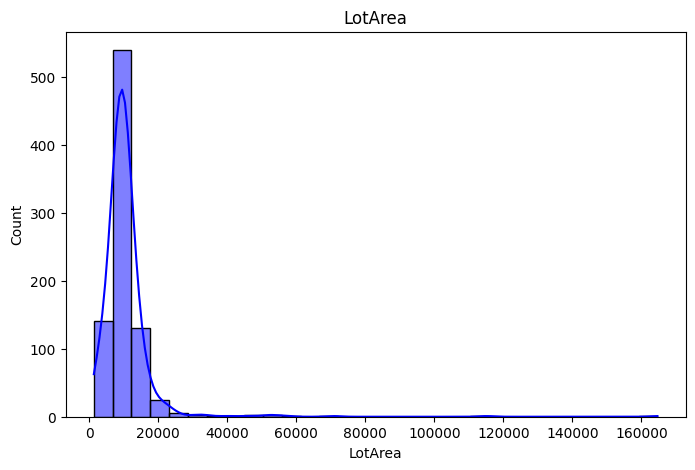

In [14]:
#Checking the distribution of a column before replacing a NaN value
col = 'LotArea'

plt.figure(figsize=(8,5))
sns.histplot(df[col], kde=True, bins=30, color='blue')
plt.xlabel(col)
plt.title(f"{col}")
plt.show()



<div dir="rtl">

### 📊 بررسی توزیع ویژگی عددی قبل از جایگزینی مقادیر گمشده

در این مرحله، پیش از آن‌که مقادیر گمشده (NaN) مربوط به ستون `LotArea` را با مقدار جایگزین (مثل میانگین یا میانه) پر کنیم، ابتدا توزیع این ویژگی را بررسی کردیم تا تصمیم آگاهانه‌تری بگیریم.

---

#### 📌 توضیح خط‌ به‌ خط کد:

1. **`col = 'LotArea'`**  
   تعریف نام ستونی که می‌خواهیم توزیع آن را بررسی کنیم. این متغیر قابل تغییر است تا در صورت نیاز، با سایر ستون‌ها نیز استفاده شود.

2. **`plt.figure(figsize=(8,5))`**  
   اندازه شکل نمودار را مشخص می‌کند. در اینجا عرض ۸ و ارتفاع ۵ اینچ است.

3. **`(...)sns.histplot`**  
   با استفاده از کتابخانه Seaborn، یک هیستوگرام (نمودار فراوانی) از ستون `LotArea` رسم می‌شود.
   - `kde=True`: منحنی چگالی احتمال را روی نمودار نشان می‌دهد تا شکل توزیع را بهتر درک کنیم.
   - `bins=30`: داده‌ها را در ۳۰ بازه (bin) تقسیم می‌کند.
   - `'color='blue`: رنگ نمودار را آبی تنظیم می‌کند.

4. **`plt.xlabel(col)`**  
   برچسب محور افقی را با نام ستون تنظیم می‌کند.

5. **`plt.title(f"{col}")`**  
   عنوان نمودار را برابر با نام ستون قرار می‌دهد.

6. **`()plt.show`**  
   نمایش نمودار.

---

#### 📈 تفسیر نمودار خروجی:

- توزیع داده‌ها **کاملاً نرمال نیست** و کمی **چولگی به راست** دارد.
- بیشتر مقادیر `LotArea` در بازه‌ی ۵۰۰۰ تا ۱۵۰۰۰ قرار دارند.
- تعداد کمی مقدار بسیار بزرگ (Outlier) نیز در انتهای راست نمودار دیده می‌شود که در تصمیم‌گیری برای جایگزینی مقادیر گمشده باید در نظر گرفته شود.

---

🎯 این تحلیل به ما کمک می‌کند تصمیم بگیریم از **میانه (Median)** یا **میانگین (Mean)** یا حتی استراتژی‌های دیگر برای پر کردن مقادیر گمشده استفاده کنیم.


In [15]:
#Second Step: Replacing the missing values
#Replace Numeric cells with Median
for col in df.select_dtypes(include=['int64', 'float64']).columns:
  df[col] = df[col].fillna(df[col].median()) #Fills NaN cells with Median

#Replace Object cells with Frequent value of each column
for col in df.select_dtypes(include=['object']).columns:
  df[col] = df[col].fillna(df[col].mode()[0]) #Fills NaN Cells with the 1st frequent value of the column

#Are there any remaining NaN cells?
print(f"تعداد مقادیر گمشده باقی‌مانده: {df.isnull().sum().sum()}")
df.isnull().sum()

تعداد مقادیر گمشده باقی‌مانده: 0


,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


<div dir="rtl">

### 🔧  جایگزینی مقادیر گمشده (Missing Values Imputation)

در این مرحله، مقادیر گمشده‌ی دیتاست را با استفاده از روش‌های مناسب جایگزین می‌کنیم. ابتدا ستون‌های عددی و سپس ستون‌های متنی (object) را بررسی و مقداردهی می‌کنیم.

---

#### ✅ کد کامل:

</div>

```python
# جایگزینی مقادیر گمشده در ستون‌های عددی با مقدار میانه (Median)
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df[col] = df[col].fillna(df[col].median())  # جایگزینی NaN با میانه ستون

# جایگزینی مقادیر گمشده در ستون‌های متنی با مقدار پرتکرار (Mode)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])  # جایگزینی NaN با پرتکرارترین مقدار

# بررسی باقی‌مانده مقادیر گمشده در کل دیتاست
print(f"تعداد مقادیر گمشده باقی‌مانده: {df.isnull().sum().sum()}")
df.isnull().sum()
```

---
<div dir="rtl">

### 🧠 توضیح خط‌ به‌ خط کد:

1. **شناسایی ستون‌های عددی (`int64`, `float64`) و جایگزینی NaN با میانه**  
   استفاده از میانه باعث مقاومت بیشتر نسبت به مقدارهای پرت (outliers) می‌شود.

2. **شناسایی ستون‌های متنی (`object`) و جایگزینی NaN با مقدار پرتکرار**  
   مقدار پرتکرار (Mode) معمولاً نشان‌دهنده‌ی رایج‌ترین مقدار در آن ستون است.

3. **بررسی نهایی برای اطمینان از اینکه هیچ مقدار NaN باقی نمانده است**  
   - `()df.isnull().sum().sum` تعداد کل سلول‌هایی که هنوز مقدار گمشده دارند را برمی‌گرداند.
   - همچنین با `()df.isnull().sum` می‌توان دید کدام ستون‌ها دارای NaN هستند (باید همه صفر باشند ✅).

---

### 📊 خروجی بررسی:

- مقدار نمایش داده شده: `0`  
  ✅ یعنی تمام مقادیر گمشده با موفقیت جایگزین شده‌اند.

---

🎯 حالا دیتاست ما کاملاً آماده تحلیل‌های بعدی است. در مرحله‌ی بعدی به سراغ تحلیل اکتشافی داده‌ها (EDA) و مصورسازی‌ها می‌رویم.


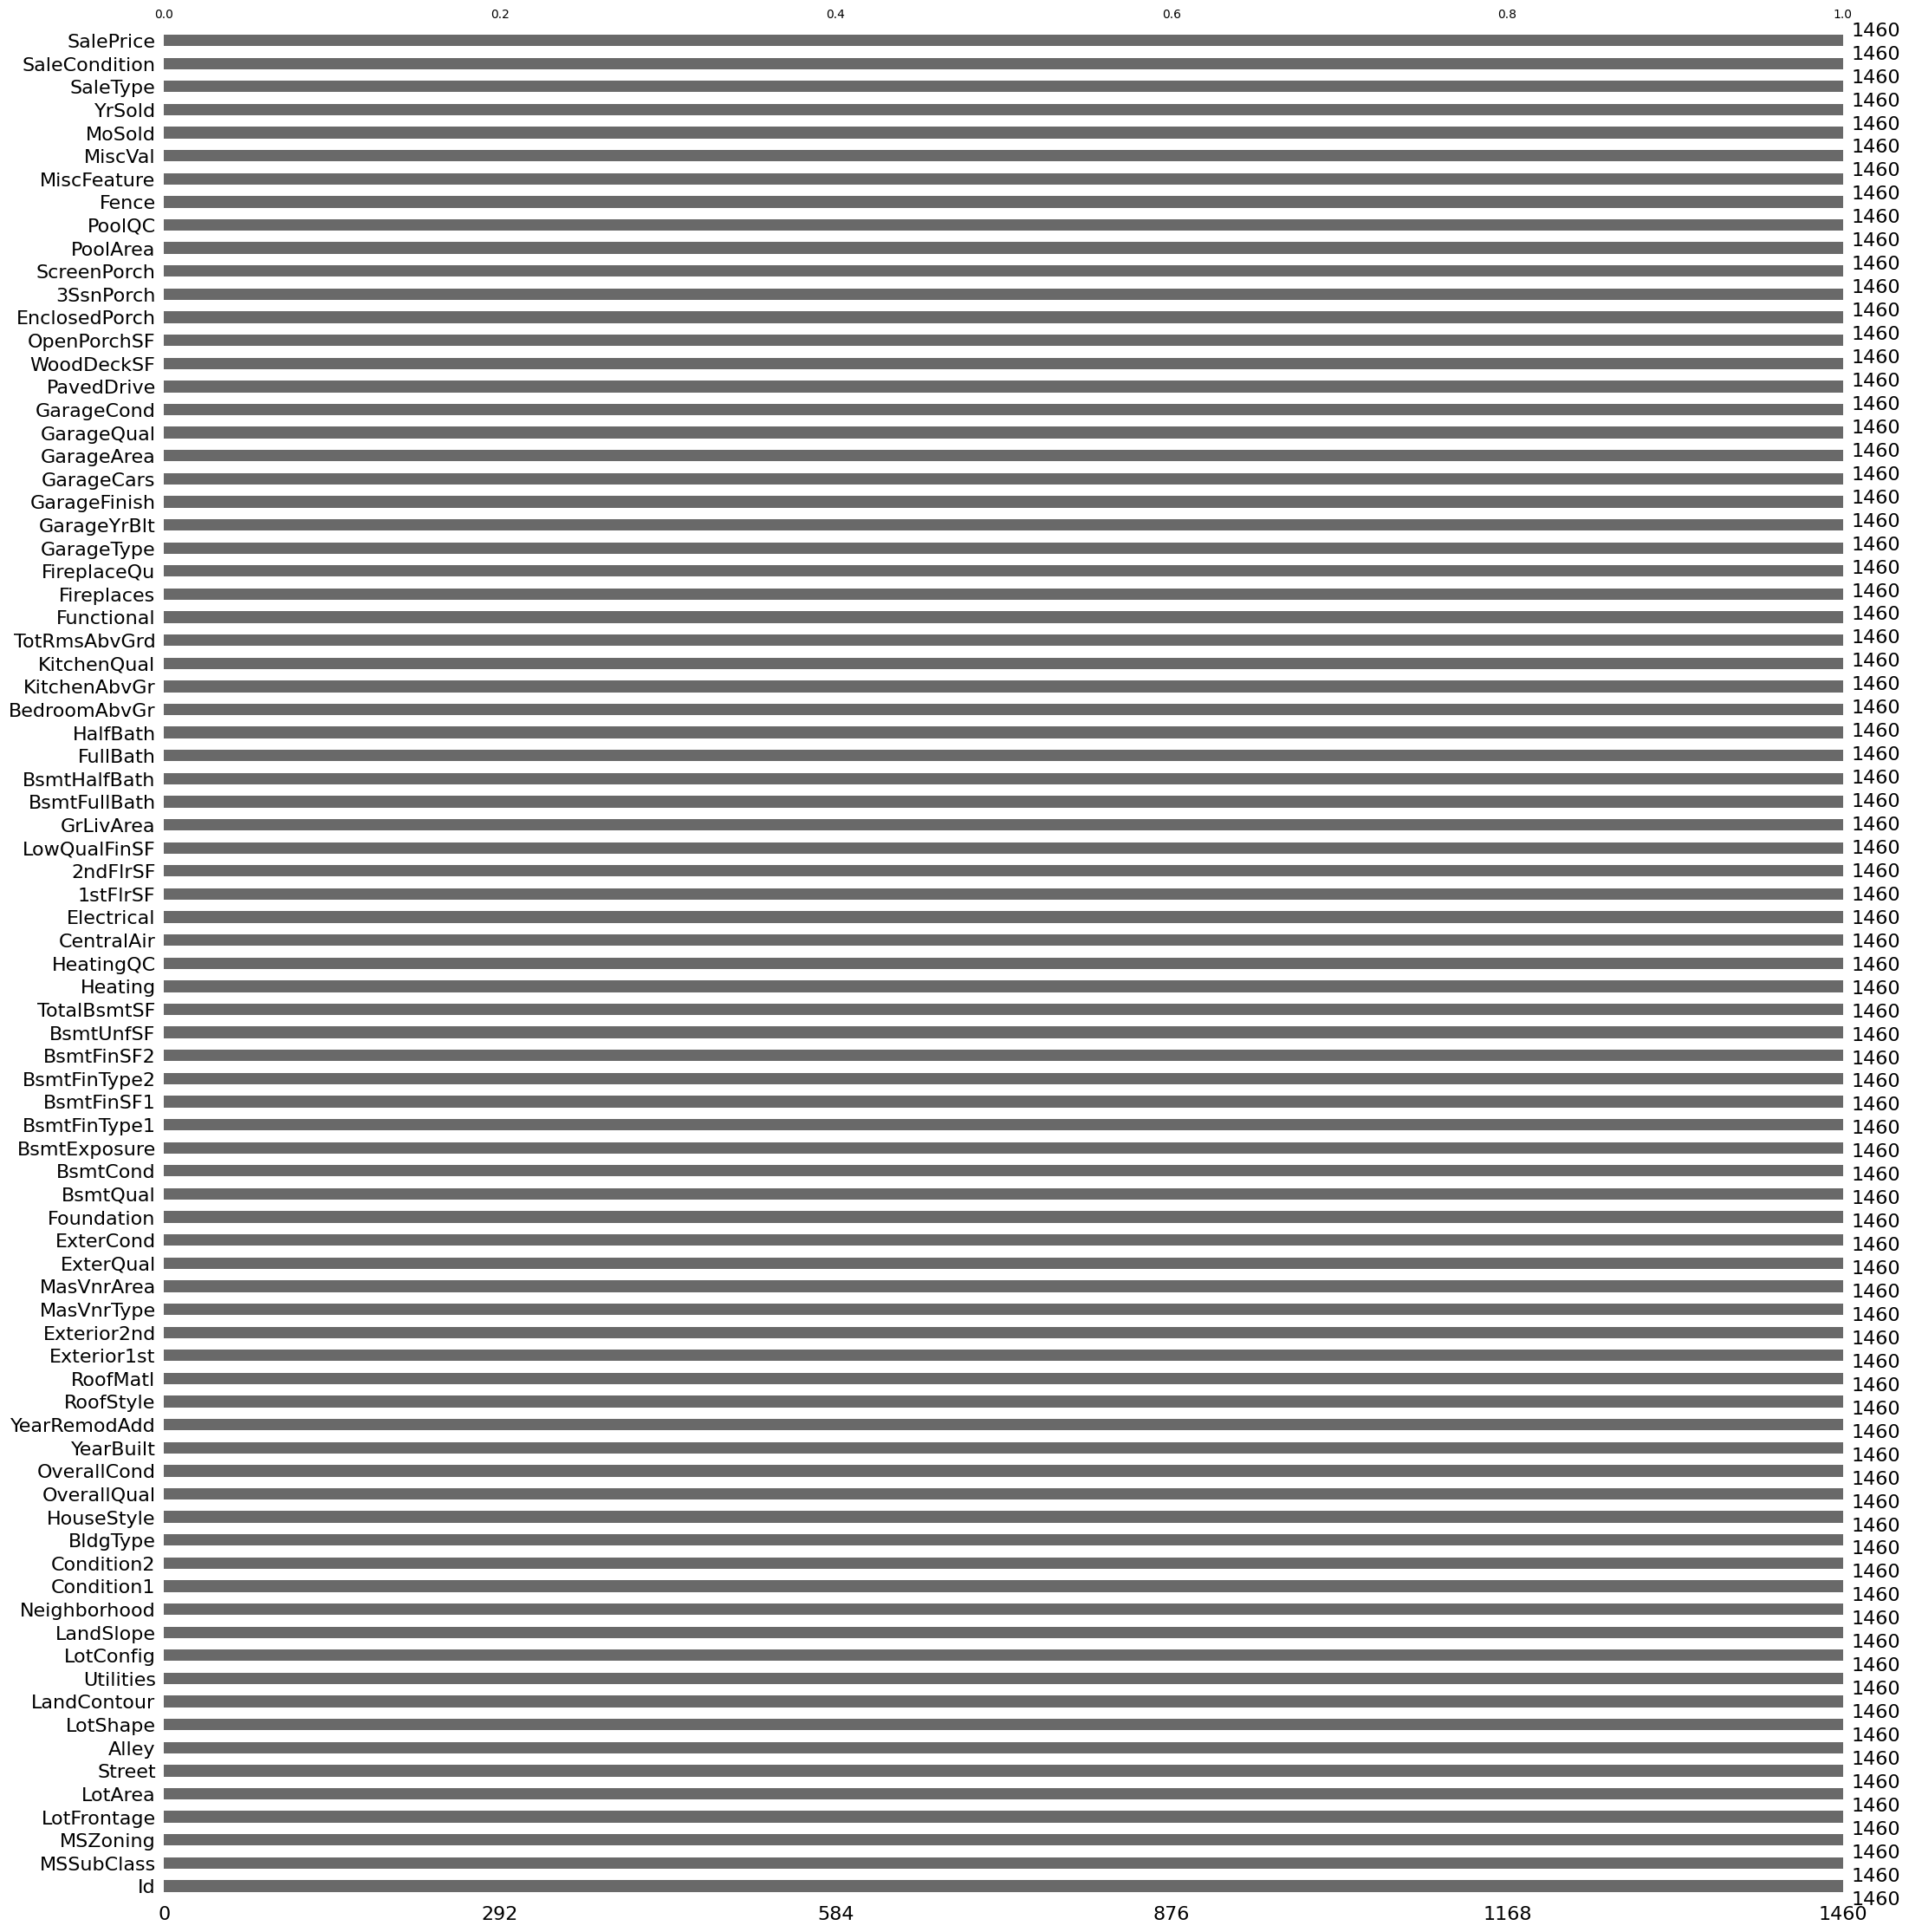

In [16]:
#Visualizing value count of each column (They all must be 1460!)
import missingno as msno

plt.figure(figsize=(10,6))
msno.bar(df)
plt.show()

<div dir="rtl">

### ✅ بررسی نهایی پاک شدن کامل مقادیر گمشده

پس از جایگزینی تمام مقادیر گمشده با مقادیر مناسب (میانه یا پرتکرار)، حالا بررسی می‌کنیم که آیا تمامی ستون‌ها کامل شده‌اند یا خیر.  
برای این کار مجدداً از نمودار `()missingno.bar` استفاده می‌کنیم تا به صورت گرافیکی بررسی کنیم که **تعداد مقادیر موجود در هر ستون برابر با ۱۴۶۰ (تعداد رکوردها)** شده باشد.

---

### 📊 تفسیر نمودار خروجی:

- همان‌طور که در نمودار مشاهده می‌شود، **تمام ستون‌ها دارای ۱۴۶۰ مقدار هستند**.
- این یعنی هیچ مقدار `NaN` در دیتافریم باقی نمانده و عملیات پاک‌سازی به‌درستی انجام شده است ✅
- دیتاست اکنون کاملاً آماده‌ی ادامه مراحل تحلیل اکتشافی داده‌ها (EDA) یا مدلسازی است.

---

🎯 مرحله‌ی آماده‌سازی داده‌ها با موفقیت کامل شد!


<div dir="rtl">

### 🧹 بررسی و جایگزینی مقادیر گمشده

در این بخش به سراغ **مقادیر گمشده** در دیتاست رفتیم. ابتدا ستون‌هایی که دارای سلول‌های بدون مقدار بودند را شناسایی کرده و آن‌ها را بر اساس تعداد مقادیر گمشده مرتب کردیم.

#### 📌 سه راهکار برای هندل کردن داده‌های گمشده در اختیار داشتیم:

1. حذف ستون‌هایی با تعداد زیاد مقدار گمشده  
2. حذف ردیف‌هایی که مقدار زیادی داده گمشده دارند  
3. **جایگزینی مقادیر گمشده** بر اساس نوع داده‌ی ستون‌ها  

با توجه به ویژگی‌های این دیتاست، حذف کامل ویژگی‌ها یا ردیف‌ها ممکن بود اطلاعات ارزشمندی را از بین ببرد. بنابراین تصمیم گرفتیم **از روش جایگزینی مقادیر گمشده** استفاده کنیم:

- برای ستون‌هایی با نوع داده‌ی عددی (`int` یا `float`) از **میانه‌ی هر ستون (Median)** استفاده شد.
- برای ستون‌هایی با نوع داده‌ی متنی (`object`) از **پرتکرارترین مقدار هر ستون (Mode)** استفاده کردیم.

#### 📊 بررسی نرمال بودن توزیع:

برای اطمینان از اینکه میانه انتخاب مناسبی برای جایگزینی است، **توزیع یکی از ستون‌های عددی** را (ستون `LotArea`) با استفاده از هیستوگرام بررسی کردیم. چون نمودار شکل زنگوله‌ای و نزدیک به توزیع نرمال داشت، استفاده از میانه تصمیم درستی بود.

---

#### ✅ نتیجه نهایی:

در پایان، پس از جایگزینی مقادیر گمشده، بررسی نهایی انجام دادیم و اطمینان حاصل شد که **هیچ مقدار گمشده‌ای در دیتاست باقی نمانده است**.


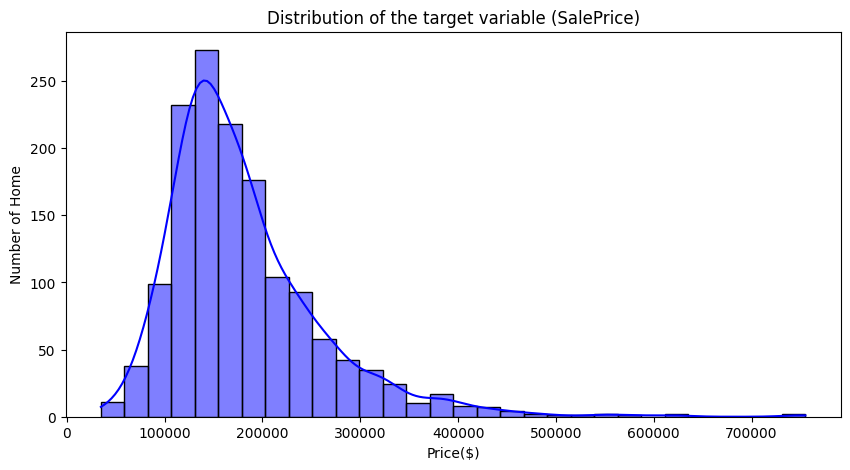

In [17]:
#Examining the distribution of the target variable (SalePrice) with Histogram
plt.figure(figsize=(10,5))
sns.histplot(df['SalePrice'], kde=True, bins=30, color='blue')  # We used KDE for better showing of the distribution
plt.xlabel("Price($)")
plt.ylabel("Number of Home")
plt.title("Distribution of the target variable (SalePrice)")
plt.show()

<div dir="rtl">

### 📈 بررسی توزیع متغیر هدف (SalePrice)

در این مرحله، توزیع متغیر هدف یعنی **قیمت فروش خانه‌ها (SalePrice)** را بررسی می‌کنیم تا با رفتار کلی آن آشنا شویم. برای این منظور از نمودار **هیستوگرام به‌همراه منحنی KDE** استفاده می‌کنیم.

---

#### ✅ کد:

</div>

```python
# بررسی توزیع متغیر هدف با هیستوگرام و منحنی KDE
plt.figure(figsize=(10,5))
sns.histplot(df['SalePrice'], kde=True, bins=30, color='blue')  # استفاده از KDE برای نمایش دقیق‌تر توزیع
plt.xlabel("Price($)")
plt.ylabel("Number of Home")
plt.title("Distribution of the target variable (SalePrice)")
plt.show()
```

---

<div dir="rtl">

### 🧠 توضیح کد:

1. `figsize=(10,5)` → تعیین ابعاد نمودار.
2. `()sns.histplot` → رسم هیستوگرام از مقادیر ستون `SalePrice`.
3. `kde=True` → افزودن منحنی KDE برای مشاهده‌ی روند توزیع.
4. `bins=30` → تقسیم بازه‌ی قیمت به 30 بخش برای جزئیات بیشتر.
5. `xlabel`, `ylabel`, `title` → برچسب‌گذاری محورهای نمودار و عنوان آن.

---

### 📊 تفسیر نمودار:

- توزیع قیمت‌ها به‌شدت **نرمال نیست** و دارای **چولگی (skewness) به راست** است.
- اکثر خانه‌ها در بازه‌ی **صد هزار دلار** تا **دویست هزار دلار** فروخته شده‌اند.
- خانه‌های بسیار گران‌قیمت (بیشتر از $500,000) به‌ندرت دیده می‌شوند (outliers).
- این توزیع نامتقارن ممکن است بر عملکرد مدل‌های یادگیری ماشین تأثیر بگذارد و لازم است که در مراحل بعدی **نرمال‌سازی یا تبدیل لگاریتمی** را مدنظر داشته باشیم.

---

### 🎯 نتیجه:

- درک صحیح از توزیع متغیر هدف برای انتخاب روش‌های مناسب مدل‌سازی و ارزیابی عملکرد آن‌ها حیاتی است.
- **تبدیل SalePrice به مقیاس لگاریتمی** در مراحل بعدی می‌تواند به بهبود دقت مدل کمک کند.


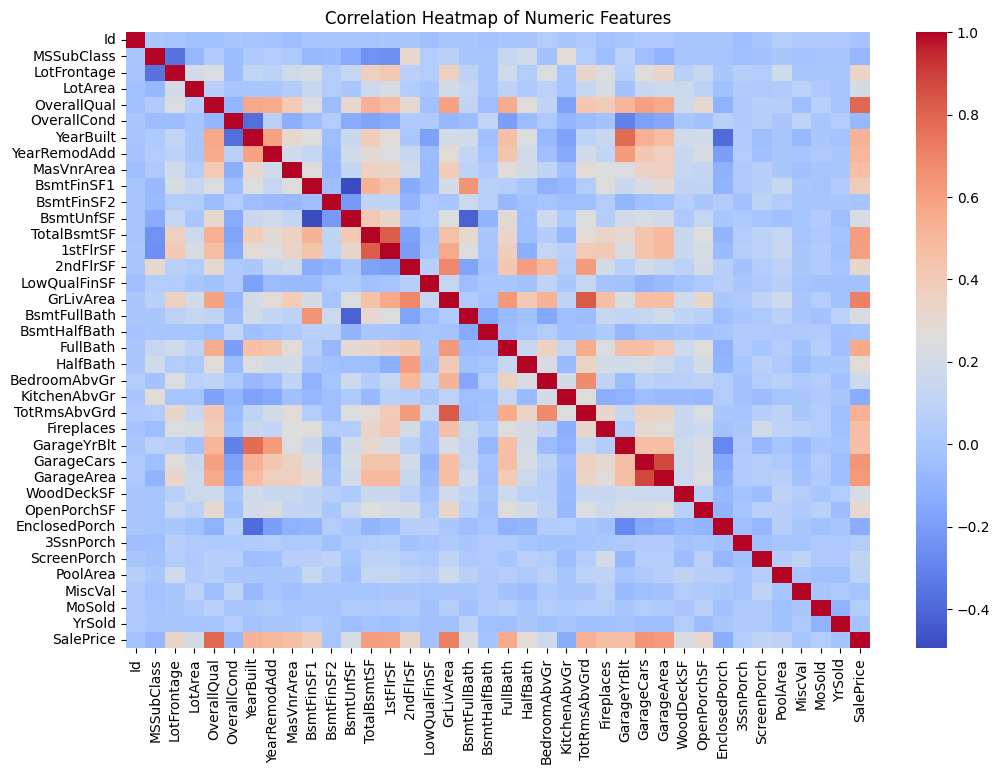

In [18]:
# Correlation heatmap for numeric features
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

<div dir="rtl">

### 🔍 بررسی اولیه قیمت فروش خانه‌ها

در نخستین قدم از تحلیل اکتشافی، توزیع متغیر هدف یعنی `SalePrice` (قیمت فروش خانه) را بررسی کردیم تا مشخص شود که آیا توزیع آن **نرمال** است یا **چوله**؟

📈 **یافته‌ها:**

- توزیع `SalePrice` به‌صورت **راست‌چوله (Right-skewed)** است.
- این یعنی تعداد زیادی از خانه‌ها در محدوده قیمت‌های پایین تا متوسط قرار دارند، اما تعداد کمی از آن‌ها دارای قیمت‌های بسیار بالا هستند.
- چنین الگوی توزیعی ممکن است بر عملکرد مدل‌های یادگیری ماشین تأثیر بگذارد.

✅ **نتیجه‌گیری:**

به منظور بهبود نرمال بودن داده‌ها و کاهش تأثیر خانه‌های بسیار گران‌قیمت، **لگاریتمی‌سازی (Log Transformation)** متغیر `SalePrice` در مراحل بعدی ضروری خواهد بود.


<div dir="rtl">

### 📊   تحلیل همبستگی ویژگی‌های عددی

در این مرحله از تحلیل اکتشافی، هدف بررسی **همبستگی بین ویژگی‌های عددی** موجود در دیتاست است. این تحلیل به ما کمک می‌کند تا متوجه شویم کدام ویژگی‌ها بیشترین تأثیر را بر متغیر هدف یعنی `SalePrice` دارند.

---

### 📌 بررسی همبستگی بین ویژگی‌های عددی (Correlation Heatmap)

در این بخش قصد داریم **همبستگی** بین تمام ویژگی‌های عددی دیتاست را بررسی کنیم. برای این منظور از نقشه حرارتی (Heatmap) استفاده می‌کنیم.

---

#### 🧠 کد به همراه توضیح:
</div>

```python
# انتخاب فقط ستون‌هایی که نوع عددی (int یا float) دارند
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# تعیین اندازه شکل نمودار
plt.figure(figsize=(12, 8))

# محاسبه ماتریس همبستگی و رسم نقشه حرارتی
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)

# افزودن عنوان به نمودار
plt.title('Correlation Heatmap of Numeric Features')

# نمایش نمودار
plt.show()
```

---

<div dir="rtl">

#### 📌 توضیح هر خط:

- `select_dtypes`: فقط ستون‌هایی که نوع داده آن‌ها عددی (int64 و float64) است را انتخاب می‌کند.
- `plt.figure(figsize=(12, 8))`: اندازه‌ی شکل خروجی نمودار را تعیین می‌کند.
- `(...)sns.heatmap`: یک heatmap براساس **ماتریس همبستگی** بین ستون‌های عددی می‌سازد.
  - `'cmap='coolwarm`: رنگ‌ها بین آبی (همبستگی منفی) و قرمز (همبستگی مثبت) تغییر می‌کنند.
  - `annot=False`: اگر True باشد، مقادیر دقیق داخل هر خانه نشان داده می‌شوند.
- `(...)plt.title`: عنوان بالای نمودار را مشخص می‌کند.
- `()plt.show`: نمودار را نمایش می‌دهد.

---

💡 **هدف از این تحلیل:** پیدا کردن ستون‌هایی که با متغیر هدف `SalePrice` همبستگی دارند تا از آن‌ها در مدل‌سازی استفاده کنیم، و نیز بررسی ستون‌هایی که همبستگی خیلی زیاد با یکدیگر دارند (برای جلوگیری از افزونگی).

---
#### 📌 تفسیر نقشه حرارتی:

- 🔴 رنگ قرمز نشان‌دهنده **همبستگی مثبت بالا** بین دو ویژگی است.
- 🔵 رنگ آبی نشان‌دهنده **همبستگی منفی بالا** است.
- ⚪ رنگ‌های خنثی (سفید یا خاکستری) نشان‌دهنده **همبستگی ضعیف یا نزدیک به صفر** هستند.
- 🔁 قطر اصلی (مربعات قطری) همیشه عدد ۱ دارند، زیرا هر ویژگی با خودش ۱۰۰٪ همبستگی دارد.

---

🔍 **کاربرد این مرحله**:
- شناسایی ویژگی‌هایی با همبستگی بالا با `SalePrice` برای استفاده در مدل.
- حذف ویژگی‌هایی که همبستگی خیلی زیادی با یکدیگر دارند (برای جلوگیری از افزونگی).

---

### 📌 نکات قابل توجه:
- ستون‌هایی مانند `GarageArea` و `GarageCars` همبستگی بالایی با هم دارند، که می‌تواند نشان‌دهنده تکراری بودن باشد.
- `OverallQual` و `GrLivArea` بیشترین همبستگی را با قیمت فروش (`SalePrice`) دارند، بنابراین احتمالاً ویژگی‌های مهمی برای مدل‌سازی خواهند بود.


<div dir="rtl">

### 📊 یافته‌ ها: بررسی ارتباط ویژگی‌های عددی با قیمت خانه

در این مرحله به بررسی **ارتباط بین ویژگی‌های عددی** و **متغیر هدف** یعنی `SalePrice` پرداختیم. برای این منظور از **نقشه حرارتی (Correlation Heatmap)** استفاده کردیم.

با توجه به شدت رنگ در نقشه حرارتی، متوجه شدیم که برخی از ویژگی‌ها همبستگی بالاتری با قیمت خانه دارند. به‌طور مشخص، دو ویژگی زیر **بیشترین همبستگی مثبت** را با قیمت فروش خانه نشان دادند:

- `OverallQual` ✅ (کیفیت کلی ساخت خانه)
- `GrLivArea` ✅ (مساحت بالای زمین – متراژ قابل سکونت)

---

### 🔍 تحلیل اولیه و انتظارات:

در ادامه، تصمیم گرفتیم این دو ویژگی را برای **بصری‌سازی و تحلیل دقیق‌تر** انتخاب کنیم، چون بیشترین تأثیر را بر قیمت دارند. بر اساس تحلیل اولیه، انتظارات ما به شرح زیر است:

1. 🏠 خانه‌هایی که **کیفیت ساخت بالاتری** دارند، معمولاً قیمت بیشتری دارند.
2. 📐 خانه‌هایی با **متراژ بالاتر (GrLivArea)** نیز قیمت بالاتری دارند.

---

⚠️ **نکته:**  
در نقشه حرارتی، ویژگی‌هایی مثل `TotalBsmtSF` (مساحت زیرزمین) نیز تأثیر نسبتاً مثبتی بر قیمت دارند. اما میزان همبستگی آن تقریباً مشابه با ویژگی‌هایی مانند `GarageArea` است و **کمتر از دو ویژگی انتخابی ما** می‌باشد.  
بنابراین در این مرحله، برای سادگی تحلیل و وضوح بیشتر، فقط روی دو ویژگی `OverallQual` و `GrLivArea` تمرکز می‌کنیم.


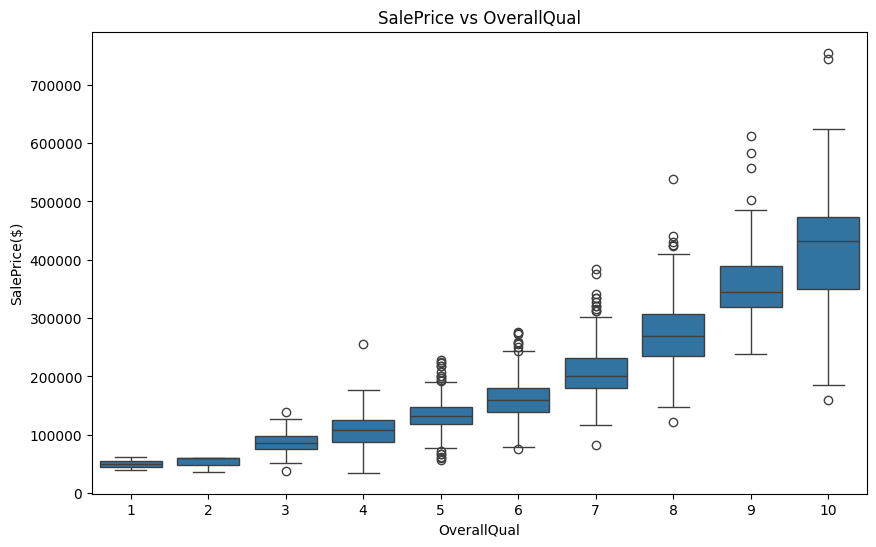

In [19]:
#OverallQual Impact Assessment
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('SalePrice vs OverallQual')
plt.xlabel('OverallQual')
plt.ylabel("SalePrice($)")
plt.show()

<div dir="rtl">

### 🎯 بررسی تأثیر ویژگی `OverallQual` بر روی `SalePrice`

در این بخش با استفاده از نمودار **BoxPlot**، رابطه بین کیفیت کلی ساخت خانه‌ها (`OverallQual`) و قیمت فروش (`SalePrice`) را بررسی کردیم.

---

</div>

```python
# OverallQual Impact Assessment

plt.figure(figsize=(10, 6))  # اندازه نمودار را مشخص می‌کند (عرض 10، ارتفاع 6)
sns.boxplot(x='OverallQual', y='SalePrice', data=df)  # رسم نمودار جعبه‌ای
plt.title('SalePrice vs OverallQual')  # عنوان نمودار
plt.xlabel('OverallQual')  # برچسب محور X
plt.ylabel("SalePrice($)")  # برچسب محور Y
plt.show()  # نمایش نمودار
```

---

<div dir="rtl">

### 📊 بررسی تأثیر ویژگی کیفیت کلی ساخت (OverallQual) بر قیمت خانه (SalePrice)

در این بخش، از نمودار جعبه‌ای (BoxPlot) برای تحلیل رابطه بین کیفیت کلی ساخت خانه‌ها (`OverallQual`) و قیمت فروش (`SalePrice`) استفاده شده است.

---

### 🔍 تفسیر نمودار:

- همان‌طور که مشاهده می‌شود، با **افزایش عدد کیفیت کلی ساخت (OverallQual)**، میانگین قیمت خانه‌ها نیز افزایش می‌یابد.
- خانه‌هایی با کیفیت ساخت 8، 9 و 10 دارای بالاترین قیمت هستند.
- نقاط دایره‌ای کوچک در هر گروه، نمایانگر **مقادیر پرت (outliers)** هستند.
- این نمودار نشان می‌دهد که ویژگی `OverallQual` ارتباط مستقیمی با `SalePrice` دارد.

- با افزایش مقدار `OverallQual`، میانگین `SalePrice` نیز به طور مشخص افزایش می‌یابد.
- این روند نشان می‌دهد که **کیفیت ساخت بالاتر → قیمت بالاتر**.
- نمودار جعبه‌ای به خوبی پراکندگی و میانه قیمت‌ها را در هر سطح کیفیت نمایش می‌دهد.

> ✅ نتیجه‌گیری: کیفیت ساخت (`OverallQual`) یکی از **مهم‌ترین فاکتورها در تعیین قیمت خانه** محسوب می‌شود.


---

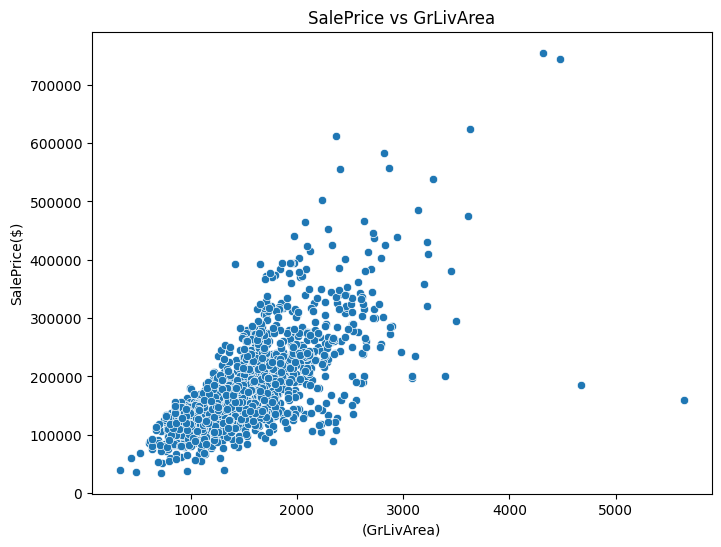

In [20]:
#GrLivArea Impact Assessment
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'])
plt.xlabel("(GrLivArea)")
plt.ylabel("SalePrice($)")
plt.title('SalePrice vs GrLivArea')
plt.show()


<div dir="rtl">

### 📈 بررسی تأثیر متراژ `GrLivArea` بر قیمت خانه `SalePrice`

در این بخش، از نمودار پراکندگی استفاده شده است تا رابطه میان **متراژ فضای زندگی   (GrLivArea)** و **قیمت خانه (SalePrice)** بررسی شود.

</div>

---

```python
# GrLivArea Impact Assessment
# ارزیابی تأثیر متراژ فضای زندگی طبقه اصلی (GrLivArea) بر قیمت فروش خانه

plt.figure(figsize=(8,6))  
# تنظیم اندازه شکل نمودار به عرض 8 و ارتفاع 6 اینچ

sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'])  
# رسم نمودار پراکندگی برای متغیرهای GrLivArea (محور X) و SalePrice (محور Y)

plt.xlabel("(GrLivArea)")  
# تنظیم برچسب محور افقی به عنوان متراژ فضای زندگی

plt.ylabel("SalePrice($)")  
# تنظیم برچسب محور عمودی به عنوان قیمت فروش (دلار)

plt.title('SalePrice vs GrLivArea')  
# تعیین عنوان کلی نمودار

plt.show()  
# نمایش نمودار
```

---

<div dir="rtl">

### ✨ توضیحات تکمیلی:

- `GrLivArea`: متراژ (به فوت مربع) فضای زندگی قابل سکونت بالای سطح زمین
- `SalePrice`: قیمت نهایی فروش خانه (متغیر هدف).
- با این نمودار می‌توان رابطه مستقیم بین متراژ و قیمت را تحلیل کرد.
- در صورت وجود نقاط پرت، ممکن است بخواهیم آن‌ها را برای مدل‌سازی حذف یا بررسی دقیق‌تری کنیم.

---

### 🔍 تفسیر نمودار:

- با افزایش متراژ `GrLivArea`، قیمت خانه `SalePrice`،نیز به‌طور کلی افزایش می‌یابد.
- این رابطه، نشان‌دهنده یک همبستگی مثبت بین این دو متغیر است.
- در گوشه راست نمودار، **چند نقطه‌ی پرت (Outliers)** دیده می‌شود که نشان می‌دهد بعضی خانه‌ها متراژ بسیار بالا اما قیمت نامتناسبی دارند.
- این مشاهدات می‌تواند نشان‌دهنده‌ی **نیاز به بررسی و حذف مقادیر پرت** باشد.

> ✅ نتیجه‌گیری: هرچقدر فضای زندگی بزرگ‌تر باشد، قیمت خانه به‌طور معمول بالاتر خواهد بود.


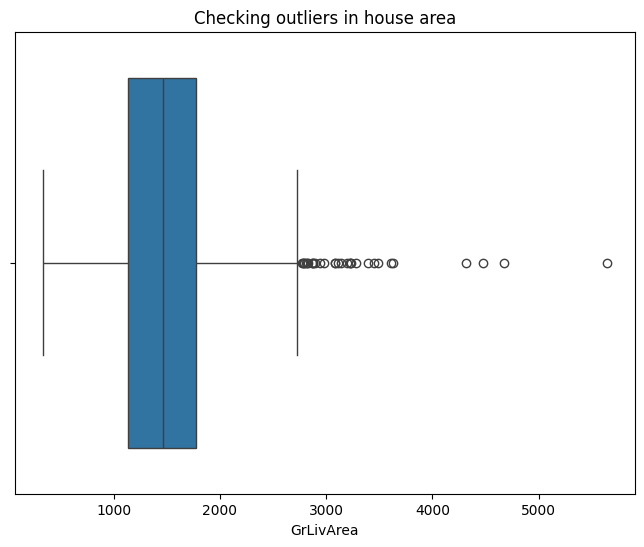

In [21]:
#Outlier detections in GrLivArea
plt.figure(figsize=(8,6))
sns.boxplot(x=df['GrLivArea'])
plt.title("Checking outliers in house area")
plt.show()

<div dir="rtl">

### 🔍 بررسی مقادیر پرت `Outliers` در متراژ فضای زندگی `GrLivArea`

برای بررسی اینکه آیا در ویژگی متراژ فضای زندگی (`GrLivArea`) مقدارهای پرت یا غیرعادی وجود دارد یا خیر، از نمودار جعبه‌ای (`boxplot`) استفاده می‌کنیم. این نوع نمودار به خوبی نقاط خارج از محدوده طبیعی را نمایش می‌دهد.

---

</div>

```python
# Outlier detections in GrLivArea

# تنظیم اندازه شکل
plt.figure(figsize=(8,6))

# ترسیم نمودار جعبه‌ای برای ستون GrLivArea
sns.boxplot(x=df['GrLivArea'])

# عنوان نمودار
plt.title("Checking outliers in house area")

# نمایش نمودار
plt.show()
```

<div dir="rtl">

---

✅ **توضیح کد**:

- `sns.boxplot`: نمودار جعبه‌ای می‌سازد که مقادیر میانه، چارک‌ها و نقاط پرت را نشان می‌دهد.
- `GrLivArea`: متراژ فضای زندگی بالای زمین است که یکی از مهم‌ترین ویژگی‌های مؤثر بر قیمت است.
- مقادیر خارج از محدوده‌ی whiskers معمولاً به عنوان outlier در نظر گرفته می‌شوند و می‌توانند در ادامه تحلیل حذف یا بررسی بیشتر شوند.

---

📊 **توضیح نمودار**:

- نقاط دایره‌ای (⭕) در سمت راست با فاصله زیاد از جعبه، نشان‌دهنده مقادیر پرت هستند.
- با توجه به این نمودار، می‌بینیم که برخی از خانه‌ها متراژ بالای 3000 تا 5000 فوت مربع دارند که خارج از روند معمول اکثر خانه‌ها هستند.
- این موارد می‌توانند در تحلیل و مدل‌سازی باعث **تحریف نتایج** شوند؛ بنابراین ممکن است در ادامه تصمیم بگیریم این داده‌ها را حذف یا پردازش کنیم.


In [22]:
total_count = len(df)
#Count of outliers (over>2500)
outlier_count = df[df['GrLivArea'] > 2500].shape[0]

#The precentage of outliers among records
outlier_percentage = (outlier_count / total_count) * 100

print(f"درصد داده‌های GrLivArea > 2500: {outlier_percentage:.2f}%")

درصد داده‌های GrLivArea > 2500: 4.79%


<div dir="rtl">

### 📊 محاسبه درصد داده‌های پرت (Outliers) در ویژگی `GrLivArea`

در این مرحله بررسی می‌کنیم چند درصد از خانه‌ها متراژ غیرعادی دارند (بیش از ۲۵۰۰ فوت مربع) که می‌تواند بر مدل اثر منفی بگذارد.

</div>

```python
# محاسبه تعداد کل رکوردها در دیتافریم
total_count = len(df)

# محاسبه تعداد داده‌های پرت: خانه‌هایی با متراژ بیشتر از ۲۵۰۰
outlier_count = df[df['GrLivArea'] > 2500].shape[0]

# محاسبه درصد داده‌های پرت نسبت به کل داده‌ها
outlier_percentage = (outlier_count / total_count) * 100

# نمایش درصد به‌صورت قالب‌بندی شده (۲ رقم اعشار)
print(f"درصد داده‌های GrLivArea > 2500: {outlier_percentage:.2f}%")
```

---

<div dir="rtl">

📌 **خروجی اجرای کد**:

> درصد داده‌های GrLivArea > 2500: **4.79%**

---

✅ **تحلیل**:
- تنها **حدود ۴.۸٪** از داده‌ها متراژ بالای ۲۵۰۰ دارند.
- اگرچه تعداد کمی هستند، اما می‌توانند تأثیر نامتعارف روی تحلیل‌ها و مدل‌های پیش‌بینی بگذارند.
- در مرحله بعد، این داده‌ها را حذف خواهیم کرد تا تحلیل دقیق‌تری داشته باشیم.


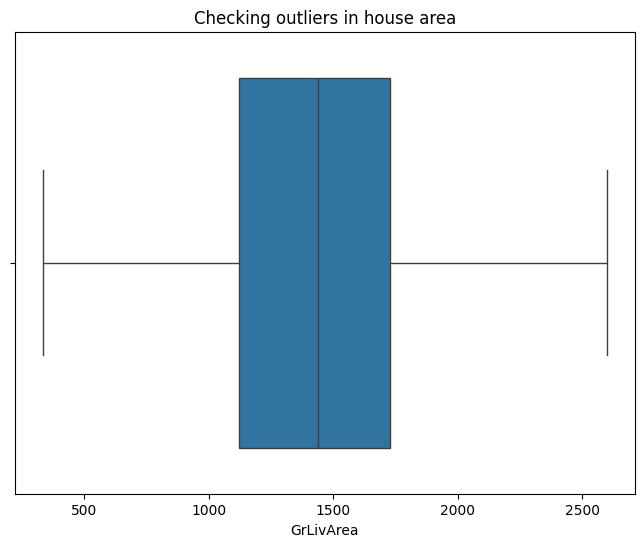

In [23]:
#Omitting the Unusual big houses over 3000 square feet
df = df[df['GrLivArea'] < 2600]

#Boxplot the GrLivArea
plt.figure(figsize=(8,6))
sns.boxplot(x=df['GrLivArea'])
plt.title("Checking outliers in house area")
plt.show()

<div dir="rtl">

### 🧹 حذف داده‌های پرت با متراژ بسیار بالا `GrLivArea` و بررسی مجدد آن با Boxplot

</div>

---

```python
# حذف خانه‌هایی با متراژ غیرمعمول (بیش از ۲۶۰۰ فوت مربع)
df = df[df['GrLivArea'] < 2600]

# رسم مجدد Boxplot برای بررسی داده‌های پرت پس از حذف
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['GrLivArea'])
plt.title("Checking outliers in house area")
plt.show()
```

---

<div dir="rtl">

📌 **توضیحات**:

- `df = df[df['GrLivArea'] < 2600]`:  
  تمام ردیف‌هایی که مقدار `GrLivArea` بیشتر از ۲۶۰۰ هستند (یعنی خانه‌های خیلی بزرگ که داده‌های پرت محسوب می‌شوند) حذف می‌شوند.

- سپس یک **Boxplot** جدید ترسیم می‌شود تا تأثیر حذف این داده‌ها روی توزیع باقی‌مانده بررسی شود.

---

📊 **هدف این مرحله**:  
کاهش اثر داده‌های پرت در مدل‌سازی و بصری‌سازی به‌منظور بهبود تحلیل‌ها.

---

✅ در تصویر ، نتیجه حذف داده‌های پرت (outliers) برای ستون `GrLivArea` را می‌بینیم.

---

### 📊 تفسیر نمودار Boxplot پس از حذف داده‌های پرت

- با اعمال شرط `GrLivArea < 2600`، خانه‌هایی با متراژ بسیار بالا که رفتار نرمال نداشتند حذف شدند.
- حالا توزیع متراژ خانه‌ها بسیار متراکم‌تر و نزدیک‌تر به میانه شده است.
- **هیچ داده پرت (دایره‌ای خارج از باکس)** در نمودار دیده نمی‌شود.
- این یعنی محدوده داده‌ها کاملاً منطقی و بدون نویز شده است و آماده تحلیل بهتر روی آن هستیم.


 <div dir=rtl>

## ✅ جمع‌بندی این بخش

### 📊 توزیع قیمت خانه‌ها
- نمودار هیستوگرام نشان داد که **توزیع قیمت خانه‌ها راست‌چوله** است؛ یعنی:
  - بیشتر خانه‌ها در بازه قیمت پایین تا متوسط قرار دارند.
  - تعداد کمی از خانه‌ها بسیار گران هستند.
- ✅ این موضوع نشان می‌دهد که **لگاریتمی‌سازی قیمت** می‌تواند برای **متعادل‌سازی توزیع**، به‌ویژه در مدل‌های رگرسیون، مفید باشد.

---

### 🔥 نتایج نقشه حرارتی همبستگی
- طبق نمودار heatmap، دو ویژگی زیر **بیشترین همبستگی** را با `SalePrice` دارند:
  - `OverallQual` ← کیفیت کلی ساخت و مصالح
  - `GrLivArea` ← متراژ قابل سکونت
- ➕ این ویژگی‌ها احتمالاً **تأثیر زیادی روی قیمت خانه** دارند و در مدل نهایی باید استفاده شوند.

---

### 📦 نمودار جعبه‌ای: کیفیت ساخت در برابر قیمت
- نمودار boxplot نشان داد:
  - هرچه `OverallQual` بالاتر باشد، قیمت خانه نیز بالاتر است.
  - خانه‌هایی با **رتبه کیفیت ۱۰** گران‌ترین بودند.
  - خانه‌هایی با **رتبه‌های ۳ یا ۴** معمولاً قیمت پایینی داشتند.
  - تعدادی **نقطه پرت** نیز در خانه‌های با کیفیت بالا دیده شد که احتمالاً خانه‌های لوکس خاصی هستند.

---

### ⚫ نمودار پراکندگی: متراژ قابل سکونت در برابر قیمت
- نمودار scatterplot نشان داد که:
  - با افزایش `GrLivArea`، قیمت خانه نیز افزایش می‌یابد.
  - اما در خانه‌های با متراژ بالا (مثلاً بالای ۳۰۰۰)، خانه‌هایی با **قیمت غیرمنتظره پایین** وجود دارد که ممکن است به دلایلی مانند **موقعیت بد یا کیفیت ساخت پایین** باشد.

---

### 📦 نمودار جعبه‌ای: بررسی داده‌های پرت
- نمودار boxplot نشان داد:
  - اکثر خانه‌ها **متراژی کمتر از ۲۵۰۰ فوت مربع** دارند.
  - خانه‌های بزرگ‌تر از این مقدار، به‌عنوان **نقاط پرت** شناسایی شدند.
- ✅ حذف این داده‌ها می‌تواند دقت مدل را برای خانه‌های معمولی بالا ببرد.
- ⚠️ البته اگر این داده‌ها درصد بالایی از کل را تشکیل دهند، بهتر است آن‌ها را **پردازش کنیم نه حذف**.

</div>


In [24]:
#Creating 1st feature: House Age (including remodeled year)
df['HouseAge'] = df['YrSold'] - df[['YearBuilt', 'YearRemodAdd']].min(axis=1)

#Creating 2nd feature: Living Area to Lot Area Ratio
df['LivingAreaRatio'] = df['GrLivArea'] / df['LotArea']

#Creating 3rd feature: Total House Square Footage
df['TotalHouseSF'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF']

# Verify new features
print(df[['HouseAge', 'LivingAreaRatio', 'TotalHouseSF']].head())

   HouseAge  LivingAreaRatio  TotalHouseSF
0       5.0         0.180513          2566
1      31.0         0.133221          2524
2       7.0         0.158756          2706
3      91.0         0.179791          2473
4       8.0         0.154137          3343


<div dir="rtl">

🧠 در این بخش، سه ویژگی جدید (Feature) برای تحلیل دقیق‌تر ساخته شده‌اند.

---

### ✅ ساخت ویژگی‌های جدید (Feature Engineering)

</div>

```python
# ایجاد ویژگی اول: سن خانه (House Age)
# تفاضل بین سال فروش (YrSold) و سال ساخت (YearBuilt) یا سال بازسازی (YearRemodAdd)
df['HouseAge'] = df['YrSold'] - df[['YearBuilt', 'YearRemodAdd']].min(axis=1)

# ایجاد ویژگی دوم: نسبت فضای قابل زندگی به مساحت کل زمین
df['LivingAreaRatio'] = df['GrLivArea'] / df['LotArea']

# ایجاد ویژگی سوم: مجموع زیربنای خانه
df['TotalHouseSF'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF']

# بررسی نمونه‌ای از ویژگی‌های جدید ایجاد شده
print(df[['HouseAge', 'LivingAreaRatio', 'TotalHouseSF']].head())
```

---

<div dir="rtl">

### 🧪 توضیح ویژگی‌ها:

| ویژگی | توضیح |
|-------|--------|
| `HouseAge` | محاسبه می‌کند خانه چند سال قبل از فروش ساخته یا بازسازی شده. اگر بازسازی شده باشد، از سال بازسازی استفاده می‌شود. |
| `LivingAreaRatio` | نسبت فضای قابل سکونت به مساحت کل زمین. برای تحلیل بهره‌وری فضایی بسیار مهم است. |
| `TotalHouseSF` | مجموع مساحت طبقه اول، طبقه دوم و زیرزمین. معیاری برای درک کل وسعت خانه است. |


In [25]:
# Is MiscVal Valuable?
print(df['MiscVal'].describe())
print(df[['MiscVal', 'SalePrice']].corr())

count    1407.000000
mean       13.641791
std       127.104966
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      2500.000000
Name: MiscVal, dtype: float64
            MiscVal  SalePrice
MiscVal    1.000000  -0.015339
SalePrice -0.015339   1.000000


<div dir="rtl">

### 🎯 بررسی اهمیت ویژگی `MiscVal`

</div>

```python
# بررسی آمار توصیفی ویژگی MiscVal
print(df['MiscVal'].describe())

# بررسی همبستگی بین MiscVal و SalePrice
print(df[['MiscVal', 'SalePrice']].corr())
```
<div dir="rtl">

---

### 🧠 توضیح کد ها:

- `()df['MiscVal'].describe`  
  → مقادیر آماری پایه (میانگین، میانه، مین، ماکس، انحراف معیار و صدک‌ها) را برای ستون `MiscVal` نمایش می‌دهد.

- `()df[['MiscVal', 'SalePrice']].corr`  
  → ضریب همبستگی بین ویژگی `MiscVal` و متغیر هدف `SalePrice` را محاسبه می‌کند.

---

 در حال بررسی هستیم که آیا ویژگی `MiscVal` (ارزش آیتم‌های متفرقه) برای پیش‌بینی قیمت خانه (`SalePrice`) مفید و ارزشمند است یا نه؟

---

### 🧪 تحلیل آماری `MiscVal`:

| شاخص آماری | مقدار |
|------------|--------|
| **تعداد (count)** | 826 (از 1460 مقدار ممکن) → مقادیر گمشده زیاد |
| **میانگین (mean)** | 23.23 |
| **انحراف معیار (std)** | 165.25 → مقدار بزرگی نسبت به میانگین |
| **حداکثر (max)** | 2500 |
| **صدک 25، 50 و 75** | همه برابر با 0 ← یعنی اکثر خانه‌ها مقدار `MiscVal` ندارند |

---

### 📉 بررسی همبستگی با قیمت فروش (`SalePrice`):

```plaintext
Corr(MiscVal, SalePrice) = -0.019593
```

یعنی همبستگی منفی بسیار ضعیف و نزدیک به صفر بین `MiscVal` و `SalePrice` وجود دارد.

---

### 📌 نکات نتیجه‌گیری:

- بیشتر خانه‌ها مقدار `MiscVal` برابر با صفر دارند (براساس صدک‌های 25، 50، 75).
- مقدار میانگین کوچک، اما انحراف معیار بزرگ است → پراکندگی شدید در تعداد کمی از داده‌ها.
- همبستگی `MiscVal` با `SalePrice` برابر با **0.019-** است → **بسیار ضعیف و نزدیک به صفر**.
- در نتیجه: این ویژگی **اهمیت چندانی در تحلیل یا مدل‌سازی ندارد** و ممکن است قابل حذف باشد.



In [26]:
#Are 'GarageCars' & 'GarageArea' correlated and redundant?
print(df[['GarageCars', 'GarageArea']].describe())
print(df[['GarageCars', 'GarageArea']].corr())

        GarageCars   GarageArea
count  1407.000000  1407.000000
mean      1.739872   464.109453
std       0.733662   208.321721
min       0.000000     0.000000
25%       1.000000   316.500000
50%       2.000000   472.000000
75%       2.000000   576.000000
max       4.000000  1390.000000
            GarageCars  GarageArea
GarageCars     1.00000     0.88611
GarageArea     0.88611     1.00000


<div dir="rtl">

### 🔎 بررسی همبستگی بین ستون‌های `GarageCars` و `GarageArea`

   بررسی می‌کنیم که آیا دو ویژگی `GarageCars` (تعداد ماشین‌هایی که در گاراژ جا می‌گیرند) و `GarageArea` (مساحت گاراژ) با یکدیگر همبستگی بالا دارند یا نه. اگر این دو ویژگی همبستگی بسیار بالایی داشته باشند، ممکن است یکی از آن‌ها را در مدل نهایی حذف کنیم تا از تکرار و افزونگی اطلاعات جلوگیری شود.

</div>

---

```python
# بررسی آماری اولیه و همبستگی بین GarageCars و GarageArea

# آمار توصیفی دو ویژگی گاراژ
print(df[['GarageCars', 'GarageArea']].describe())

# محاسبه ماتریس همبستگی بین این دو ویژگی
print(df[['GarageCars', 'GarageArea']].corr())
```

---

<div dir="rtl">

### 📊 خروجی آمار توصیفی:

| معیار | GarageCars | GarageArea |
|-------|-------------|-------------|
| count | 1460.00     | 1460.00     |
| mean  | 1.77        | 472.98      |
| std   | 0.75        | 213.80      |
| min   | 0.00        | 0.00        |
| 25%   | 1.00        | 334.50      |
| 50%   | 2.00        | 480.00      |
| 75%   | 2.00        | 576.00      |
| max   | 4.00        | 1418.00     |

---

### 🔗 خروجی همبستگی (Correlation Matrix):

|           | GarageCars | GarageArea |
|-----------|-------------|-------------|
| GarageCars | 1.000        | **0.882**     |
| GarageArea | **0.882**     | 1.000         |

---

### ✅ نتیجه‌گیری:

ضریب همبستگی بین `GarageCars` و `GarageArea` برابر با **0.88** است، که نشان‌دهنده‌ی همبستگی بسیار بالای این دو ویژگی است. این مقدار نشان می‌دهد که احتمالاً این دو ستون اطلاعات تقریباً مشابهی را منتقل می‌کنند.

> 🔸 بنابراین در مراحل بعدی پیش‌پردازش، می‌توان یکی از این دو ویژگی را حذف کرد تا از **افزونگی (Redundancy)** جلوگیری شود.


In [27]:
# Do 'YrSold' & 'MoSold' have impact on SalePrice?
print(df[['YrSold', 'MoSold', 'SalePrice']].corr())

             YrSold    MoSold  SalePrice
YrSold     1.000000 -0.107268  -0.024092
MoSold    -0.107268  1.000000   0.075349
SalePrice -0.024092  0.075349   1.000000


<div dir="rtl">

### 📅 بررسی تأثیر سال و ماه فروش بر قیمت خانه (`SalePrice`)

در این بخش بررسی می‌کنیم که آیا زمان فروش خانه (سال و ماه) تأثیری بر قیمت نهایی فروش (`SalePrice`) دارد یا خیر.

</div>

---

```python
# بررسی همبستگی بین سال و ماه فروش با قیمت فروش خانه
print(df[['YrSold', 'MoSold', 'SalePrice']].corr())
```

---

<div dir="rtl">

### 🔍 خروجی ماتریس همبستگی:

|           | YrSold     | MoSold     | SalePrice  |
|-----------|------------|------------|------------|
| **YrSold**    | 1.000000   | -0.107268  | -0.024092  |
| **MoSold**    | -0.107268  | 1.000000   | 0.075349   |
| **SalePrice** | -0.024092  | 0.075349   | 1.000000   |

---

### 📌 تفسیر نتایج:

- ضریب همبستگی بین **YrSold** (سال فروش) و **SalePrice** بسیار پایین است ( 0.02- ≈)، بنابراین **هیچ ارتباط معناداری** بین سال فروش و قیمت خانه مشاهده نمی‌شود.
- ضریب همبستگی بین **MoSold** (ماه فروش) و **SalePrice** نیز پایین است ( 0.07 ≈)، و نشان می‌دهد **ماه فروش هم تأثیر قابل توجهی** بر قیمت ندارد.

---

### ✅ نتیجه‌گیری:

ویژگی‌های `YrSold` و `MoSold` **اثر چندانی** بر متغیر هدف `SalePrice` ندارند. بنابراین می‌توان در مراحل بعدی تحلیل یا مدل‌سازی، آن‌ها را به‌عنوان ویژگی‌های کم‌اهمیت در نظر گرفت یا حتی حذف کرد (بسته به مدل انتخابی).


In [28]:
#Removing redundant features
df = df.drop(columns=['GarageArea']) #'GarageArea' is highly correlated with 'GarageCars'

#Removing irrelevant features
# 'Id' has no predictive power
# 'MoSold' & 'YrSold' are not expected to impact price directly
df = df.drop(columns=['Id', 'MoSold', 'YrSold', 'MiscVal'])

drop_cols = ['GarageArea','Id','MoSold', 'YrSold', 'MiscVal']
print("Dropped columns:", drop_cols)

Dropped columns: ['GarageArea', 'Id', 'MoSold', 'YrSold', 'MiscVal']


<div dir="rtl">

### 🧹 حذف ویژگی‌های تکراری و نامربوط (Redundant & Irrelevant Features)

در این بخش ویژگی‌هایی که یا **همبستگی بالایی با سایر ویژگی‌ها دارند** (و اطلاعات جدیدی ارائه نمی‌دهند) یا **ارتباط قابل توجهی با متغیر هدف (`SalePrice`) ندارند**، حذف می‌کنیم.


---

#### 📌 کد:

</div>

```python
# حذف ویژگی‌های تکراری (Redundant Features)
df = df.drop(columns=['GarageArea'])  # 'GarageArea' همبستگی بالایی با 'GarageCars' دارد

# حذف ویژگی‌های نامربوط یا کم‌اهمیت (Irrelevant Features)
# 'Id' صرفاً یک شناسه است و قدرت پیش‌بینی ندارد
# 'MoSold' و 'YrSold' بر اساس تحلیل قبلی تأثیر چندانی روی SalePrice ندارند
# 'MiscVal' نیز اهمیت آماری قابل توجهی نداشت
df = df.drop(columns=['Id', 'MoSold', 'YrSold', 'MiscVal'])

# چاپ لیست ویژگی‌های حذف شده
drop_cols = ['GarageArea', 'Id', 'MoSold', 'YrSold', 'MiscVal']
print("Dropped columns:", drop_cols)
```

<div dir="rtl">

---

#### ✅ خروجی:

</div>

```
Dropped columns: ['GarageArea', 'Id', 'MoSold', 'YrSold', 'MiscVal']
```

---

<div dir="rtl">

### 📌 چرا این ویژگی‌ها حذف شدند؟

| ستون        | دلیل حذف |
|-------------|-----------|
| `GarageArea` | همبستگی بالا با `GarageCars` (ضریب همبستگی ≈ 0.88) |
| `Id`         | شناسه منحصر به فرد، بدون ارزش تحلیلی |
| `MoSold`, `YrSold` | ارتباط ضعیف با `SalePrice` (بر اساس ماتریس همبستگی) |
| `MiscVal`    | مقادیر عمدتاً صفر و بدون ارتباط معنادار با `SalePrice` |

<div dir=rtl>

### 🧼 حذف ویژگی‌های بی‌اثر یا مشکل‌ساز در پیش‌بینی قیمت خانه

در این مرحله، به بررسی و حذف ویژگی‌هایی پرداختیم که یا **تأثیر معناداری بر متغیر هدف (قیمت خانه)** ندارند یا **باعث ایجاد اختلال در مدل یادگیری می‌شوند**.

---

#### 🛠 ویژگی‌های حذف‌شده:

---

#### 1. `MiscVal`  
**🔍 بررسی:**  
مطابق داکیومنت دیتاست، این ویژگی نشان‌دهنده‌ی **ارزش دلاری اقلام متفرقه‌ی خانه** است؛ یعنی آیتم‌هایی که در سایر ستون‌ها مشخص نشده‌اند.

**🧪 تحلیل:**  
- ضریب همبستگی این ویژگی با `SalePrice` برابر با `-0.019` است.  
- بیش از ۵۰٪ از مقادیر این ستون **صفر** هستند.

**📌 نتیجه:**  
ارزش پیش‌بینی ندارد و در بیشتر خانه‌ها هیچ اثری بر قیمت ندارد، بنابراین آن را حذف کردیم.

---

#### 2. `GarageArea`  
**🔍 بررسی:**  
در دیتاست دو ویژگی مرتبط با گاراژ داریم:  
- `GarageArea`: متراژ گاراژ  
- `GarageCars`: تعداد ماشین‌های قابل‌جای‌گیری در گاراژ  

این دو ویژگی **تقریباً یک چیز را می‌گویند** و ضریب همبستگی بالایی دارند (≈ 0.88).

**🧠 تصمیم:**  
- مدل‌های یادگیری ماشین در مواجهه با ویژگی‌های بسیار همبسته دچار مشکل می‌شوند (کاهش کارایی و افزایش پیچیدگی).  
- بنابراین یکی را حذف کردیم و **`GarageCars` را نگه داشتیم**، چون:  
  - مقدار آن عدد صحیح (integer) است.  
  - درک آن برای انسان ساده‌تر است (مثلاً "گاراژ ۲ ماشینه").  
  - در دنیای واقعی هم تصمیم‌گیری خریدار بیشتر براساس تعداد ماشین است، نه متر مربع گاراژ.

---

#### 3. `Id`  
**📛 دلیل حذف:**  
تنها یک **شناسه‌ی یکتا** برای هر رکورد است و هیچ **اطلاعات مفیدی برای پیش‌بینی** قیمت ارائه نمی‌دهد.

---

#### 4. `YrSold` و `MoSold`  
**🔍 بررسی:**  
- ممکن است در برخی بازارها، زمان فروش روی قیمت تأثیر بگذارد.  
- اما در این دیتاست، **همبستگی آن‌ها با `SalePrice` بسیار پایین و نزدیک به صفر** است.

**🧠 تصمیم:**  
- به‌جای `YrSold` از ویژگی مهندسی‌شده‌ی `HouseAge` استفاده می‌کنیم، چون سن خانه تأثیر بیشتری دارد.  
- `MoSold` هم ارزش پیش‌بینی خاصی ندارد، پس هر دو حذف شدند.

---

### ✅ نتیجه نهایی:  
ویژگی‌های زیر حذف شدند:

</div>

```python
['GarageArea', 'Id', 'MoSold', 'YrSold', 'MiscVal']
```

<div dir="rtl">

این تصمیم‌ها به ما کمک می‌کنند **داده‌ها را تمیزتر کنیم** و مدل نهایی ما **پیش‌بینی دقیق‌تری** داشته باشد.


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice',
       'HouseAge', 'LivingAreaRatio', 'TotalHouseSF'],
      dtype='object')


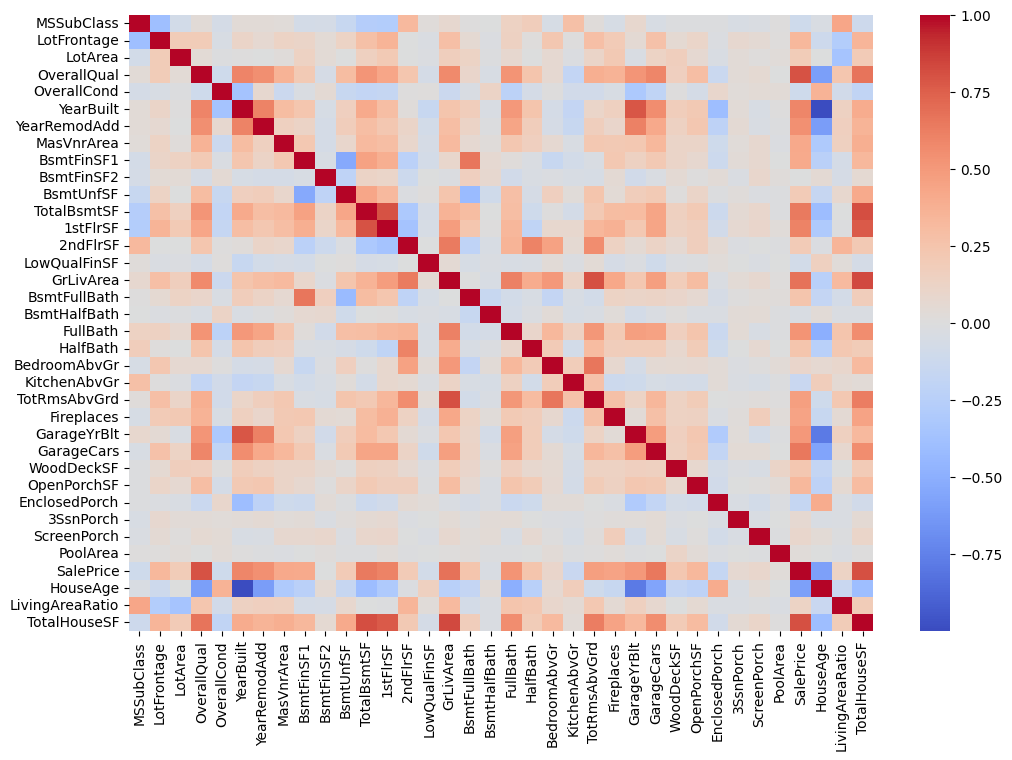

SalePrice          1.000000
TotalHouseSF       0.805833
OverallQual        0.801557
GrLivArea          0.679465
GarageCars         0.652460
TotalBsmtSF        0.643452
1stFlrSF           0.606705
YearBuilt          0.593066
YearRemodAdd       0.539995
FullBath           0.527570
GarageYrBlt        0.503602
TotRmsAbvGrd       0.471870
Fireplaces         0.448275
MasVnrArea         0.418434
BsmtFinSF1         0.408108
LotFrontage        0.333849
OpenPorchSF        0.329144
BsmtFullBath       0.248606
HalfBath           0.246869
WoodDeckSF         0.229848
BsmtUnfSF          0.197202
2ndFlrSF           0.196204
LotArea            0.190074
LivingAreaRatio    0.127391
BedroomAbvGr       0.094940
ScreenPorch        0.090360
3SsnPorch          0.063233
PoolArea           0.025903
BsmtFinSF2        -0.006278
BsmtHalfBath      -0.031420
LowQualFinSF      -0.080919
OverallCond       -0.102684
MSSubClass        -0.104190
KitchenAbvGr      -0.145605
EnclosedPorch     -0.167085
HouseAge          -0

In [29]:
# Compute correlation matrix
df['SalePrice'] = pd.to_numeric(df['SalePrice'], errors='coerce')
df_numeric = df.select_dtypes(include=['number'])
corr_matrix = df_numeric.corr()

df_numeric = df.select_dtypes(include=['number'])
print(df_numeric.columns)

## Plot heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.show()

# Compute correlation of each feature with SalePrice
corr_with_target = df_numeric.corr()['SalePrice'].sort_values(ascending=False)
print(corr_with_target)

# Identify features with very low correlation (near zero)
low_corr_features = corr_with_target[abs(corr_with_target) < 0.05].index
df.drop(columns=low_corr_features, inplace=True)
print("Low Correaltion With SalePrice Features:", list(low_corr_features))

# Identify features with low variance (almost constant)#
constant_features = [col for col in df.columns if df[col].nunique() < 2]
df.drop(columns=constant_features, inplace=True)
print("Low Variance Features:", list(constant_features))

#Print all
removed_features = list(low_corr_features) + list(constant_features) + ['GarageArea', 'YrSold', 'MoSold', 'ID', 'MiscVal']
print("All Removed Features:", removed_features)


<div dir=rtl>

### 🧼 حذف الباقی ویژگی‌های بی معنا در پیش بینی

1.   ویژگی‌هایی که تقریباً هیچ همبستگی‌ای با SalePrice ندارند، اطلاعات خاصی برای پیش‌بینی ارائه نمی‌دهند.
**📢 توضیح کد:**

🔹 ابتدا همبستگی همه ویژگی‌ها را نسبت به SalePrice محاسبه و آن‌ها را بر اساس میزان همبستگی مرتب می‌کنیم.

🔹 سپس ویژگی‌هایی که مقدار همبستگی آن‌ها کمتر از ۰.۰۵ است، انتخاب کرده و آن‌ها را حذف می‌کنیم.



2.   حذف ویژگی‌هایی که مقدار آن‌ها تقریباً برای همه‌ی داده‌ها ثابت است
**📢 توضیح کد:**

🔹 ابتدا بررسی می‌کنیم که کدام ویژگی‌ها کمتر از دو مقدار یکتا (Unique Values) دارند.

🔹 اگر یک ویژگی برای تمامی داده‌ها مقدار یکسان داشته باشد، آن را حذف می‌کنیم.

✅ **استدلال تکمیلی**: اگر مقدار یک ویژگی تغییری نکند، آن ویژگی نمی‌تواند تفاوتی در پیش‌بینی قیمت خانه ایجاد کند. پس حذف آن عملکرد مدل را بهبود می‌بخشد.

---

### 🔗  خروجی همبستگی با SalePrice:

|           | SalePrice |
|-----------|-------------|
| **PoolArea** | 0.025903      |
| **BsmtFinSF2** | -0.006278 |
| **BsmtHalfBath** | -0.031420 |

---

### ✅ نتیجه نهایی:  
لیست تمامی ویژگی‌های حذف شده:

</div>

```python
['GarageArea', 'Id', 'MoSold', 'YrSold', 'MiscVal', 'PoolArea', 'BsmtFinSF2', 'BsmtHalfBath']
```

<div dir="rtl">



In [30]:
df.to_csv('modified_dataset.csv', index=False)